# H-DNA Density in Alu & SVA Repeats
## Investigating H-DNA in relationship to STR and G4

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import pybedtools
from tqdm import tqdm
from pybedtools import BedTool
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns

pybedtools.set_tempdir("/storage/home/nmc6088/scratch")

In [4]:
df_mirrors = pd.read_table("../transfer_mirror/mirrors/chm13v2.0_MR.processed.tsv")
df_mirrors

,seqID,start,end,sequenceOfArm,sequenceOfSpacer,sequence,armLength,spacerLength,sequenceLength,arm_a,arm_g,arm_c,arm_t,composition
0,chr1,1710,1752,accccaaccccaaccccaacc,.,accccaaccccaaccccaaccccaaccccaaccccaacccca,21,0,42,7,0,14,0,7A/14C/0G/0T
1,chr1,1712,1756,cccaaccccaaccccaacccca,.,cccaaccccaaccccaaccccaaccccaaccccaaccccaaccc,22,0,44,7,0,15,0,7A/15C/0G/0T
2,chr1,6739,6764,acaaaaataa,aagcc,acaaaaataaaagccaataaaaaca,10,5,25,8,0,1,1,8A/1C/0G/1T
3,chr1,17295,17316,aaaataaata,a,aaaataaataaataaataaaa,10,1,21,8,0,0,2,8A/0C/0G/2T
4,chr1,17607,17628,aaaaaacaaa,c,aaaaaacaaacaaacaaaaaa,10,1,21,9,0,1,0,9A/1C/0G/0T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256987,chrY,62453725,62453769,ttggggttggggttggggttgg,.,ttggggttggggttggggttggggttggggttggggttggggtt,22,0,44,0,14,0,8,0A/0C/14G/8T
1256988,chrY,62453777,62453814,gggtgggggtgggggtgg,g,gggtgggggtgggggtgggggtgggggtgggggtggg,18,1,37,0,15,0,3,0A/0C/15G/3T
1256989,chrY,62453779,62453818,gtgggggtgggggtggggg,t,gtgggggtgggggtgggggtgggggtgggggtgggggtg,19,1,39,0,16,0,3,0A/0C/16G/3T
1256990,chrY,62453862,62453919,gggttggggttggggttggggttgggg,tta,gggttggggttggggttggggttggggttaggggttggggttgggg...,27,3,57,0,19,0,8,0A/0C/19G/8T


In [133]:
df_mirrors.spacerLength.min(), df_mirrors.spacerLength.max()

(0, 7)

In [134]:
df_mirrors.armLength.min(), df_mirrors.armLength.max()

(10, 398)

In [135]:
df_mirrors.spacerLength\
            .value_counts(normalize=True)\
            .sort_values(ascending=False)

spacerLength
1    0.487084
0    0.200790
3    0.068579
7    0.067500
5    0.054903
2    0.046961
6    0.037535
4    0.036648
Name: proportion, dtype: float64

In [8]:
df_mirrors["at"] = df_mirrors["sequence"].str.count("a|t").div(df_mirrors['sequenceLength'])
df_mirrors["ct"] = df_mirrors["sequence"].str.count("c|t").div(df_mirrors['sequenceLength'])
df_mirrors["ag"] = df_mirrors["sequence"].str.count("a|g").div(df_mirrors["sequenceLength"])

In [136]:
df_hdna = (
        df_mirrors[
            (df_mirrors["at"] < 0.8) & ((df_mirrors["ag"] >= 0.9) | (df_mirrors["ct"] >= 0.9))
    ]
)
df_hdna

,seqID,start,end,sequenceOfArm,sequenceOfSpacer,sequence,armLength,spacerLength,sequenceLength,arm_a,arm_g,arm_c,arm_t,composition,at,ct,ag
10,chr1,50042,50071,ggagggaggga,ggcagaa,ggagggagggaggcagaaagggagggagg,11,7,29,3,8,0,0,3A/0C/8G/0T,0.310345,0.034483,0.965517
11,chr1,50059,50086,aagggaggga,ggcagaa,aagggagggaggcagaaagggagggaa,10,7,27,4,6,0,0,4A/0C/6G/0T,0.407407,0.037037,0.962963
12,chr1,50082,50111,ggaaggaagga,gcaagga,ggaaggaaggagcaaggaaggaaggaagg,11,7,29,5,6,0,0,5A/0C/6G/0T,0.448276,0.034483,0.965517
13,chr1,50095,50117,aaggaaggaag,.,aaggaaggaaggaaggaaggaa,11,0,22,6,5,0,0,6A/0C/5G/0T,0.545455,0.000000,1.000000
14,chr1,50097,50119,ggaaggaagga,.,ggaaggaaggaaggaaggaagg,11,0,22,5,6,0,0,5A/0C/6G/0T,0.454545,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256887,chrY,62192837,62192864,ctctctctctctc,t,ctctctctctctctctctctctctctc,13,1,27,0,0,7,6,0A/7C/0G/6T,0.481481,1.000000,0.000000
1256900,chrY,62247108,62247130,aaagaaggaag,.,aaagaaggaaggaaggaagaaa,11,0,22,7,4,0,0,7A/0C/4G/0T,0.636364,0.000000,1.000000
1256901,chrY,62247260,62247284,gggagggagg,ggat,gggagggaggggatggagggaggg,10,4,24,2,8,0,0,2A/0C/8G/0T,0.250000,0.041667,0.958333
1256903,chrY,62255805,62255833,aggaggaggaggag,.,aggaggaggaggaggaggaggaggagga,14,0,28,5,9,0,0,5A/0C/9G/0T,0.357143,0.000000,1.000000


In [137]:
df_hdna_bed = BedTool.from_dataframe(df_hdna[["seqID", "start", "end"]]).sort()
df_hdna_bed.count()

235970

In [138]:
df_hdna_bed.merge().count()

123604

In [139]:
merged_hdna = pd.read_table(
            df_hdna_bed.merge().fn,
            header=None,
            names=["seqID", "start", "end"]
)
merged_hdna['length'] = merged_hdna['end'] - merged_hdna['start']
merged_hdna['length'].sum(), merged_hdna['length'].shape

(4953001, (123604,))

In [140]:
df_mirrors.describe(exclude=object)

,start,end,armLength,spacerLength,sequenceLength,arm_a,arm_g,arm_c,arm_t,at,ct,ag
count,1.256992e+06,1.256992e+06,1.256992e+06,1.256992e+06,1.256992e+06,1.256992e+06,1.256992e+06,1.256992e+06,1.256992e+06,1.256992e+06,1.256992e+06,1.256992e+06
mean,7.415188e+07,7.415191e+07,1.317289e+01,1.905560e+00,2.825134e+01,4.893687e+00,1.500315e+00,1.633119e+00,5.145770e+00,7.656872e-01,5.137584e-01,4.862416e-01
std,5.657263e+07,5.657263e+07,4.758742e+00,2.068498e+00,9.551475e+00,4.781066e+00,2.891636e+00,2.988948e+00,4.758927e+00,2.285331e-01,3.475510e-01,3.475510e-01
min,1.140000e+03,1.166000e+03,1.000000e+01,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.776558e+07,2.776561e+07,1.000000e+01,1.000000e+00,2.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.428571e-01,2.000000e-01,1.666667e-01
50%,6.323525e+07,6.323528e+07,1.200000e+01,1.000000e+00,2.600000e+01,5.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,8.260870e-01,5.121951e-01,4.878049e-01
75%,1.109012e+08,1.109012e+08,1.400000e+01,3.000000e+00,3.100000e+01,9.000000e+00,2.000000e+00,2.000000e+00,9.000000e+00,1.000000e+00,8.333333e-01,8.000000e-01
max,2.483847e+08,2.483848e+08,3.980000e+02,7.000000e+00,7.970000e+02,1.600000e+02,1.880000e+02,2.390000e+02,1.620000e+02,1.000000e+00,1.000000e+00,1.000000e+00


In [141]:
df_mirrors.armLength.min(), df_mirrors.armLength.max()

(10, 398)

In [142]:
centromere_path = Path("../transfer_mirror/primates/centromeres/chm13v2.0_censat_v2.0.bed").resolve()
centromere_path

PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primates/centromeres/chm13v2.0_censat_v2.0.bed')

In [19]:
centromere_chm = pd.read_table(centromere_path, skiprows=1, header=None, usecols=range(4), names=["seqID", "start", "end", "compartment"])
centromere_chm.loc[:, "compartment"] = centromere_chm["compartment"].apply(lambda x: x.split("_")[0])
centromere_chm_bed = BedTool.from_dataframe(centromere_chm)
centromere_chm

,seqID,start,end,compartment
0,chr1,116796047,121405145,ct
1,chr1,121405145,121406286,censat
2,chr1,121406286,121619169,ct
3,chr1,121619169,121625213,hor
4,chr1,121625213,121667941,hor
...,...,...,...,...
2518,chrY,62025776,62037362,censat
2519,chrY,62052955,62059882,censat
2520,chrY,62061431,62072743,hsat3
2521,chrY,62072743,62087298,bsat


In [20]:
unique_compartments = centromere_chm['compartment'].unique()
unique_compartments

array(['ct', 'censat', 'hor', 'dhor', 'hsat2', 'hsat3', 'gsat', 'bsat',
       'mon', 'hsat1A', 'hsat1B', 'rDNA'], dtype=object)

In [21]:
centromere_chm = pd.read_table(centromere_path, skiprows=1, header=None, usecols=range(4), names=["seqID", "start", "end", "compartment"])
centromere_chm.loc[:, "compartment"] = centromere_chm["compartment"].apply(lambda x: x.split("_")[0])
centromere_chm_bed = BedTool.from_dataframe(centromere_chm)

unique_compartments = centromere_chm['compartment'].unique()
unique_compartments

merged_centromeric_compartments = []

for compartment in tqdm(unique_compartments):
    centro_bed = (
                    BedTool.from_dataframe(centromere_chm[centromere_chm['compartment'] == compartment])
                    .sort()
                    .merge()
                )
    temp_centro = pd.read_table(
                    centro_bed.fn,
                    header=None,
                    names=["seqID", "start", "end"]
    )
    temp_centro.loc[:, "compartment"] = compartment
    merged_centromeric_compartments.append(temp_centro)
    
merged_centromeric_compartments = pd.concat(merged_centromeric_compartments, axis=0)
merged_centromeric_compartments

100%|██████████| 12/12 [00:00<00:00, 48.17it/s]


,seqID,start,end,compartment
0,chr1,116796047,121405145,ct
1,chr1,121406286,121619169,ct
2,chr1,121788213,121790362,ct
3,chr1,126838321,126840458,ct
4,chr1,126848989,126877724,ct
...,...,...,...,...
0,chr13,5770548,9348041,rDNA
1,chr14,2099537,2817811,rDNA
2,chr15,2506442,4707485,rDNA
3,chr21,3108298,5612715,rDNA


In [22]:
df_hdna_bed = BedTool.from_dataframe(df_hdna)
merged_centromeric_compartments_bed = BedTool.from_dataframe(merged_centromeric_compartments)

df_coverage = pd.read_table(
                    merged_centromeric_compartments_bed.coverage(df_hdna_bed).fn,
                    header=None,
                    names=["seqID", "start", "end", "compartment", "totalHits", "overlappingBp", "compartmentLength", "coverage"]
)
df_coverage["coverage"] = 1e2 * df_coverage["coverage"]
df_coverage       

,seqID,start,end,compartment,totalHits,overlappingBp,compartmentLength,coverage
0,chr1,116796047,121405145,ct,265,5457,4609098,0.11840
1,chr1,121406286,121619169,ct,33,505,212883,0.23722
2,chr1,121788213,121790362,ct,0,0,2149,0.00000
3,chr1,126838321,126840458,ct,0,0,2137,0.00000
4,chr1,126848989,126877724,ct,14,281,28735,0.97790
...,...,...,...,...,...,...,...,...
2373,chr13,5770548,9348041,rDNA,12120,267152,3577493,7.46758
2374,chr14,2099537,2817811,rDNA,1980,43959,718274,6.12009
2375,chr15,2506442,4707485,rDNA,6138,137899,2201043,6.26517
2376,chr21,3108298,5612715,rDNA,7096,162057,2504417,6.47085


Text(0.5, 0, 'Compartment')

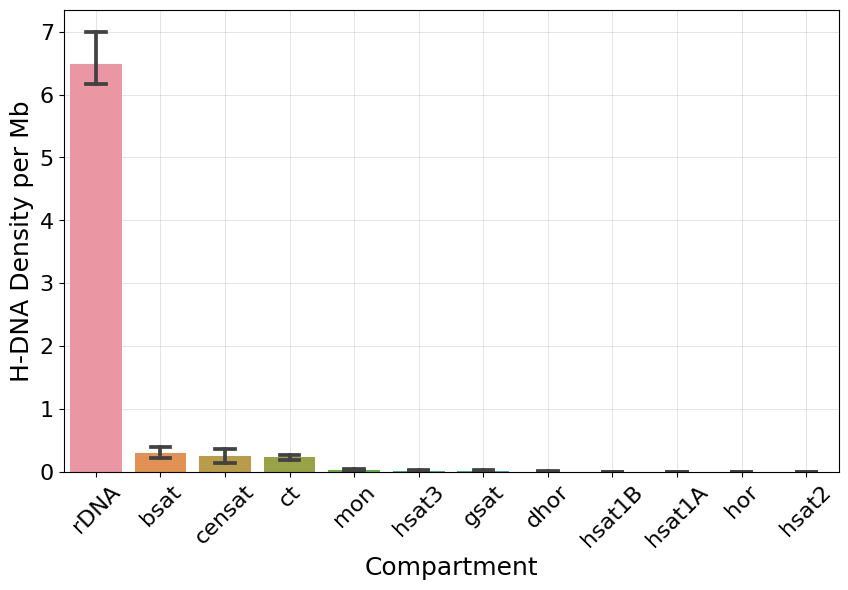

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

sns.barplot(data=df_coverage, capsize=.3, y="coverage", x="compartment", ax=ax, order=df_coverage.groupby("compartment").agg({"coverage": "mean"}).sort_values(by=['coverage'], ascending=False).index.tolist())
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_axisbelow(True)
ax.tick_params(axis="both", labelsize=16)
ax.tick_params(axis="x", rotation=45)
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.set_ylabel("H-DNA Density per Mb")
ax.set_xlabel("Compartment")

# Relationship of H-DNA with G4

In [24]:
df_g4 = pd.read_table("g4_results/chm13v2_g4hunter.txt", usecols=range(3))
df_g4

,seqID,start,end
0,chr10,17,42
1,chr10,21,48
2,chr10,27,54
3,chr10,33,60
4,chr10,39,66
...,...,...,...
2081176,chrY,62459974,62460001
2081177,chrY,62459980,62460007
2081178,chrY,62459986,62460013
2081179,chrY,62459992,62460019


In [1]:
df_STR = pd.read_parquet("/storage/group/izg5139/default/external/satellites/scripts/tandem_primates/filtered_accessions/primates/chm13v2.0.filtered.parquet.snappy")
df_STR["start"] = df_STR["start"] - 1
df_STR

NameError: name 'pd' is not defined

In [144]:
df_STR_bed = BedTool.from_dataframe(df_STR).sort().merge()
df_STR_bed

<BedTool(/storage/home/nmc6088/scratch/pybedtools.15325d9g.tmp)>

In [147]:
df_hdna_bed = BedTool.from_dataframe(df_hdna).sort().merge()

In [149]:
df_hdna = pd.read_table(
            df_hdna_bed.subtract(df_STR_bed).fn,
            header=None,
            names=["seqID", "start", "end"]
        )
df_hdna['length'] = df_hdna['end'] - df_hdna['start']

In [150]:
df_hdna['length'].sum()

1821951

In [25]:
df_g4_bed = BedTool.from_dataframe(df_g4[["seqID", "start", "end"]]).sort().merge()

In [26]:
df_hdna_bed = BedTool.from_dataframe(df_hdna).sort().merge()

In [27]:
merged_centromeric_compartments

,seqID,start,end,compartment
0,chr1,116796047,121405145,ct
1,chr1,121406286,121619169,ct
2,chr1,121788213,121790362,ct
3,chr1,126838321,126840458,ct
4,chr1,126848989,126877724,ct
...,...,...,...,...
0,chr13,5770548,9348041,rDNA
1,chr14,2099537,2817811,rDNA
2,chr15,2506442,4707485,rDNA
3,chr21,3108298,5612715,rDNA


In [28]:
df_hdna_bed.fn

'/storage/home/nmc6088/scratch/pybedtools.kzxj9cz_.tmp'

In [29]:
!wc -l /storage/home/nmc6088/scratch/pybedtools.sth8prd7.tmp

wc: /storage/home/nmc6088/scratch/pybedtools.sth8prd7.tmp: No such file or directory


In [30]:
rDNA_comp = merged_centromeric_compartments.query("compartment == 'rDNA'")
rDNA_comp

,seqID,start,end,compartment
0,chr13,5770548,9348041,rDNA
1,chr14,2099537,2817811,rDNA
2,chr15,2506442,4707485,rDNA
3,chr21,3108298,5612715,rDNA
4,chr22,4793794,5720650,rDNA


In [31]:
rDNA_comp_bed = BedTool.from_dataframe(rDNA_comp.drop(columns=['compartment']))
rDNA_comp_bed

<BedTool(/storage/home/nmc6088/scratch/pybedtools.b89ugp8j.tmp)>

In [32]:
df_hdna

,seqID,start,end,sequenceOfArm,sequenceOfSpacer,sequence,armLength,spacerLength,sequenceLength,arm_a,arm_g,arm_c,arm_t,composition,at,ct,ag
10,chr1,50042,50071,ggagggaggga,ggcagaa,ggagggagggaggcagaaagggagggagg,11,7,29,3,8,0,0,3A/0C/8G/0T,0.310345,0.034483,0.965517
11,chr1,50059,50086,aagggaggga,ggcagaa,aagggagggaggcagaaagggagggaa,10,7,27,4,6,0,0,4A/0C/6G/0T,0.407407,0.037037,0.962963
12,chr1,50082,50111,ggaaggaagga,gcaagga,ggaaggaaggagcaaggaaggaaggaagg,11,7,29,5,6,0,0,5A/0C/6G/0T,0.448276,0.034483,0.965517
13,chr1,50095,50117,aaggaaggaag,.,aaggaaggaaggaaggaaggaa,11,0,22,6,5,0,0,6A/0C/5G/0T,0.545455,0.000000,1.000000
14,chr1,50097,50119,ggaaggaagga,.,ggaaggaaggaaggaaggaagg,11,0,22,5,6,0,0,5A/0C/6G/0T,0.454545,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256887,chrY,62192837,62192864,ctctctctctctc,t,ctctctctctctctctctctctctctc,13,1,27,0,0,7,6,0A/7C/0G/6T,0.481481,1.000000,0.000000
1256900,chrY,62247108,62247130,aaagaaggaag,.,aaagaaggaaggaaggaagaaa,11,0,22,7,4,0,0,7A/0C/4G/0T,0.636364,0.000000,1.000000
1256901,chrY,62247260,62247284,gggagggagg,ggat,gggagggaggggatggagggaggg,10,4,24,2,8,0,0,2A/0C/8G/0T,0.250000,0.041667,0.958333
1256903,chrY,62255805,62255833,aggaggaggaggag,.,aggaggaggaggaggaggaggaggagga,14,0,28,5,9,0,0,5A/0C/9G/0T,0.357143,0.000000,1.000000


In [33]:
df_hdna_with_rDNA = pd.read_table(
                            df_hdna_bed.intersect(rDNA_comp_bed, wo=True)\
                                       .fn,
                            header=None,
                            names=["seqID", "start", "end", "chrom", "rDNA_start", "rDNA_end", "overlap"]
)

df_hdna_with_rDNA_bed = BedTool.from_dataframe(df_hdna_with_rDNA[["seqID", "start", "end"]])
df_hdna_with_rDNA_bed

<BedTool(/storage/home/nmc6088/scratch/pybedtools.dl38w49q.tmp)>

In [34]:
df_hdna_with_rDNA.shape

(18819, 7)

In [35]:
df_hdna_with_rDNA.shape[0] * 1e2 / df_hdna.shape[0]

7.975166334703564

In [36]:
df_hdna_with_rDNA_with_g4 = pd.read_table(
                                df_hdna_with_rDNA_bed.coverage(df_g4_bed).fn,
                                header=None,
                                names=["seqID", "start", "end", "totalHits", "overlappingBp", "compartmentLength", "coverage"]
)
df_hdna_with_rDNA_with_g4

,seqID,start,end,totalHits,overlappingBp,compartmentLength,coverage
0,chr13,5771056,5771124,0,0,68,0.0
1,chr13,5771408,5771437,0,0,29,0.0
2,chr13,5771577,5771603,0,0,26,0.0
3,chr13,5771718,5771749,0,0,31,0.0
4,chr13,5771812,5771834,0,0,22,0.0
...,...,...,...,...,...,...,...
18814,chr22,5711914,5711946,0,0,32,0.0
18815,chr22,5711970,5712051,0,0,81,0.0
18816,chr22,5712712,5712745,0,0,33,0.0
18817,chr22,5712993,5713038,1,45,45,1.0


In [37]:
df_hdna_with_rDNA_with_g4['overlaps_with_g4'] = (df_hdna_with_rDNA_with_g4['overlappingBp'] > 0).astype(int)

In [38]:
df_hdna_with_rDNA_with_g4.overlaps_with_g4.value_counts()

overlaps_with_g4
0    16197
1     2622
Name: count, dtype: int64

In [39]:
df_hdna_with_rDNA_with_g4.overlaps_with_g4.value_counts(normalize=True)

overlaps_with_g4
0    0.860673
1    0.139327
Name: proportion, dtype: float64

In [40]:
g4_hdna_intersect = pd.read_table(
            df_hdna_bed.coverage(
                            df_g4_bed, 
                            ).fn,
            header=None,
            names=["seqID", "start", "end", "totalHits", "overlappingBp", "compartmentLength", "coverage"]
            # names=["seqID", "start", "end", "g4_seq", "g4start", "g4end", "overlap"]
        )
g4_hdna_intersect

,seqID,start,end,totalHits,overlappingBp,compartmentLength,coverage
0,chr1,50042,50119,2,63,77,0.818182
1,chr1,73360,73386,0,0,26,0.000000
2,chr1,73390,73504,0,0,114,0.000000
3,chr1,189181,189207,0,0,26,0.000000
4,chr1,189233,189256,1,4,23,0.173913
...,...,...,...,...,...,...,...
123599,chrY,62189877,62189992,1,6,115,0.052174
123600,chrY,62192836,62192864,0,0,28,0.000000
123601,chrY,62247108,62247130,0,0,22,0.000000
123602,chrY,62247260,62247284,1,24,24,1.000000


In [41]:
g4_hdna_intersect.loc[:, "hdna_overlaps_with_g4"] = (g4_hdna_intersect['totalHits']>0).astype(int)

In [42]:
g4_hdna_intersect.hdna_overlaps_with_g4.value_counts(normalize=True)

hdna_overlaps_with_g4
0    0.698634
1    0.301366
Name: proportion, dtype: float64

In [43]:
merged_centromeric_compartments_bed = BedTool.from_dataframe(merged_centromeric_compartments)
merged_centromeric_compartments_bed

<BedTool(/storage/home/nmc6088/scratch/pybedtools.6m2fm_4b.tmp)>

In [44]:
merged_centromeric_compartments_bed

<BedTool(/storage/home/nmc6088/scratch/pybedtools.6m2fm_4b.tmp)>

In [45]:
g4_hdna_intersect

,seqID,start,end,totalHits,overlappingBp,compartmentLength,coverage,hdna_overlaps_with_g4
0,chr1,50042,50119,2,63,77,0.818182,1
1,chr1,73360,73386,0,0,26,0.000000,0
2,chr1,73390,73504,0,0,114,0.000000,0
3,chr1,189181,189207,0,0,26,0.000000,0
4,chr1,189233,189256,1,4,23,0.173913,1
...,...,...,...,...,...,...,...,...
123599,chrY,62189877,62189992,1,6,115,0.052174,1
123600,chrY,62192836,62192864,0,0,28,0.000000,0
123601,chrY,62247108,62247130,0,0,22,0.000000,0
123602,chrY,62247260,62247284,1,24,24,1.000000,1


# Alu Repeats 

In [211]:
!wget https://s3-us-west-2.amazonaws.com/human-pangenomics/T2T/CHM13/assemblies/annotation/chm13v2.0_RepeatMasker_4.1.2p1.2022Apr14.out

--2024-11-01 01:29:04--  https://s3-us-west-2.amazonaws.com/human-pangenomics/T2T/CHM13/assemblies/annotation/chm13v2.0_RepeatMasker_4.1.2p1.2022Apr14.out
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.92.195.168, 52.218.132.152, 52.92.186.184, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.92.195.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 510255277 (487M) [binary/octet-stream]
Saving to: ‘chm13v2.0_RepeatMasker_4.1.2p1.2022Apr14.out’

chm13v2.0_RepeatMas 100%[===================>] 486.62M  28.2MB/s    in 39s     

2024-11-01 01:29:44 (12.4 MB/s) - ‘chm13v2.0_RepeatMasker_4.1.2p1.2022Apr14.out’ saved [510255277/510255277]



In [59]:
!head -5 chm13v2.0_RepeatMasker_4.1.2p1.2022Apr14.out

263	27.9	2.2	3.4	chr1	41544	41632	(248345696)	+	MLT1K	LTR/ERVL-MaLR	4	91	(504)	4556095
233	25.7	5.1	0.7	chr1	85198	85334	(248301994)	C	L1M5	LINE/L1	(2780)	3366	3224	4556096
10568	0.4	0.0	0.0	chr1	152486	153701	(248233627)	+	teucerv1_5edge	Unknown	1	1216	(0)	4556097
8310	18.6	3.7	2.9	chr1	153907	156321	(248231007)	+	teucerv2_3edge	Unknown	1	1267	(0)	4556101
490	28.5	2.1	15.9	chr1	159492	159734	(248227594)	+	teucerv2_3edge	Unknown	85	303	(964)	4556103


In [212]:
!mkdir -p datasets

In [213]:
!awk -F '\t' '$10 ~ "Alu" { print $5 "\t" $6 "\t" $7 "\t" $10 }' chm13v2.0_RepeatMasker_4.1.2p1.2022Apr14.out > datasets/chm13v2.0_Alu.bed
!awk -F '\t' '$10 ~ "SVA" { print $5 "\t" $6 "\t" $7 "\t" $10 }' chm13v2.0_RepeatMasker_4.1.2p1.2022Apr14.out > datasets/chm13v2.0_SVA.bed

In [468]:
!head datasets/chm13v2.0_SVA.bed

chr1	33201157	33201208	SVA_A
chr1	203452249	203452293	SVA_B
chr15	15074264	15074335	SVA_A
chr4	3226413	3226603	SVA_F
chr1	157687	157800	SVA_E
chr1	164502	164615	SVA_E
chr1	266063	266144	SVA_D
chr1	816150	816180	SVA_A
chr1	816489	816645	SVA_A
chr1	3448481	3448497	SVA_A


In [467]:
!head datasets/chm13v2.0_Alu.bed

chr1	1236055	1236084	Alu
chr1	8617140	8617178	AluYb8
chr1	22880254	22880307	AluYi6
chr1	35184795	35184845	AluSg
chr1	38968295	38968374	AluJb
chr1	50601105	50601154	AluSq2
chr1	52868532	52868572	AluSq2
chr1	112633856	112633885	Alu
chr1	171763152	171763192	Alu
chr1	202950987	202951024	Alu


In [469]:
!wc -l datasets/chm13v2.0_Alu.bed
!wc -l datasets/chm13v2.0_SVA.bed

1147458 datasets/chm13v2.0_Alu.bed
7380 datasets/chm13v2.0_SVA.bed


In [46]:
regex_df = pd.read_table("chm13v2_regex_motifs.txt")
g4_df = pd.read_table("chm13v2_and_mouse/homo_sapiens/extractions/chm13v2_g4hunter.txt")
g4_df

,seqID,start,end,sequence,length,score,NBR
0,chr10,17,42,ctaaccctaaccctaaccctaaccc,25,-1.48,NaN
1,chr10,21,48,ccctaaccctaaccctaaccctaaccc,27,-1.67,NaN
2,chr10,27,54,ccctaaccctaaccctaaccctaaccc,27,-1.67,NaN
3,chr10,33,60,ccctaaccctaaccctaaccctaaccc,27,-1.67,NaN
4,chr10,39,66,ccctaaccctaaccctaaccctaaccc,27,-1.67,NaN
...,...,...,...,...,...,...,...
2081176,chrY,62459974,62460001,gggttagggttagggttagggttaggg,27,1.67,NaN
2081177,chrY,62459980,62460007,gggttagggttagggttagggttaggg,27,1.67,NaN
2081178,chrY,62459986,62460013,gggttagggttagggttagggttaggg,27,1.67,NaN
2081179,chrY,62459992,62460019,gggttagggttagggttagggttaggg,27,1.67,NaN


In [47]:
sva_df = pd.read_table("datasets/chm13v2.0_SVA.bed", 
                       usecols=range(3), 
                       header=None,
                      names=["seqID", "start", "end"])
sva_df.loc[:, "type"] = "SVA"

alu_df = pd.read_table("datasets/chm13v2.0_Alu.bed", 
                       usecols=range(3), 
                       header=None,
                      names=["seqID", "start", "end"])
alu_df.loc[:, "type"] = "Alu"

transposable_df = pd.concat([sva_df, alu_df])
transposable_df

,seqID,start,end,type
0,chr1,33201157,33201208,SVA
1,chr1,203452249,203452293,SVA
2,chr15,15074264,15074335,SVA
3,chr4,3226413,3226603,SVA
4,chr1,157687,157800,SVA
...,...,...,...,...
1147453,chr22,8828916,8828964,Alu
1147454,chr22,8845582,8845640,Alu
1147455,chr22,10193081,10193129,Alu
1147456,chr22,10214433,10214491,Alu


In [48]:
g4_bed = BedTool.from_dataframe(g4_df[["seqID", "start", "end"]]).sort().merge()
regex_bed = BedTool.from_dataframe(regex_df[["seqID", "start", "end"]]).sort().merge()
hdna_bed = BedTool.from_dataframe(df_hdna[["seqID", "start", "end"]]).sort()

alu_df_bed = BedTool.from_dataframe(alu_df).sort().merge()
sva_df_bed = BedTool.from_dataframe(sva_df).sort().merge()

In [49]:
BedTool.from_dataframe(alu_df).sort().count(), BedTool.from_dataframe(sva_df).sort().count()

(1147458, 7380)

In [50]:
BedTool.from_dataframe(alu_df).sort().merge().count(), BedTool.from_dataframe(sva_df).sort().merge().count()

(1146859, 6609)

In [51]:
hdna_bed.count()

235970

#### Total Alu

In [52]:
alu_df_bed.count(), alu_df_bed.merge().count()

(1146859, 1146859)

In [53]:
sva_df_bed.count(), sva_df_bed.merge().count()

(6609, 6609)

## SVA and retrotransposons are enriched in G4 motifs, to what extent H-DNA repeats were also G4 motifs?

In [55]:
df_hdna

,seqID,start,end,sequenceOfArm,sequenceOfSpacer,sequence,armLength,spacerLength,sequenceLength,arm_a,arm_g,arm_c,arm_t,composition,at,ct,ag
10,chr1,50042,50071,ggagggaggga,ggcagaa,ggagggagggaggcagaaagggagggagg,11,7,29,3,8,0,0,3A/0C/8G/0T,0.310345,0.034483,0.965517
11,chr1,50059,50086,aagggaggga,ggcagaa,aagggagggaggcagaaagggagggaa,10,7,27,4,6,0,0,4A/0C/6G/0T,0.407407,0.037037,0.962963
12,chr1,50082,50111,ggaaggaagga,gcaagga,ggaaggaaggagcaaggaaggaaggaagg,11,7,29,5,6,0,0,5A/0C/6G/0T,0.448276,0.034483,0.965517
13,chr1,50095,50117,aaggaaggaag,.,aaggaaggaaggaaggaaggaa,11,0,22,6,5,0,0,6A/0C/5G/0T,0.545455,0.000000,1.000000
14,chr1,50097,50119,ggaaggaagga,.,ggaaggaaggaaggaaggaagg,11,0,22,5,6,0,0,5A/0C/6G/0T,0.454545,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256887,chrY,62192837,62192864,ctctctctctctc,t,ctctctctctctctctctctctctctc,13,1,27,0,0,7,6,0A/7C/0G/6T,0.481481,1.000000,0.000000
1256900,chrY,62247108,62247130,aaagaaggaag,.,aaagaaggaaggaaggaagaaa,11,0,22,7,4,0,0,7A/0C/4G/0T,0.636364,0.000000,1.000000
1256901,chrY,62247260,62247284,gggagggagg,ggat,gggagggaggggatggagggaggg,10,4,24,2,8,0,0,2A/0C/8G/0T,0.250000,0.041667,0.958333
1256903,chrY,62255805,62255833,aggaggaggaggag,.,aggaggaggaggaggaggaggaggagga,14,0,28,5,9,0,0,5A/0C/9G/0T,0.357143,0.000000,1.000000


In [54]:
hdna_with_g4 = pd.read_table(
                        BedTool.from_dataframe(df_hdna)\
                                    .sort()\
                                    .intersect(g4_bed, wao=True).fn,
                        header=None,
                        names=df_hdna.columns.tolist() + ["chrom", "g4_start", "g4_end", "overlap"]
)
hdna_with_g4.loc[:, "has_g4"] = (hdna_with_g4["overlap"] > 0).astype(int)
hdna_with_g4.loc[:, "completely_covered"] = hdna_with_g4["overlap"] == hdna_with_g4["sequenceLength"]
hdna_with_g4

,seqID,start,end,sequenceOfArm,sequenceOfSpacer,sequence,armLength,spacerLength,sequenceLength,arm_a,...,composition,at,ct,ag,chrom,g4_start,g4_end,overlap,has_g4,completely_covered
0,chr1,50042,50071,ggagggaggga,ggcagaa,ggagggagggaggcagaaagggagggagg,11,7,29,3,...,3A/0C/8G/0T,0.310345,0.034483,0.965517,chr1,50039,50088,29,1,True
1,chr1,50059,50086,aagggaggga,ggcagaa,aagggagggaggcagaaagggagggaa,10,7,27,4,...,4A/0C/6G/0T,0.407407,0.037037,0.962963,chr1,50039,50088,27,1,True
2,chr1,50082,50111,ggaaggaagga,gcaagga,ggaaggaaggagcaaggaaggaaggaagg,11,7,29,5,...,5A/0C/6G/0T,0.448276,0.034483,0.965517,chr1,50039,50088,6,1,False
3,chr1,50082,50111,ggaaggaagga,gcaagga,ggaaggaaggagcaaggaaggaaggaagg,11,7,29,5,...,5A/0C/6G/0T,0.448276,0.034483,0.965517,chr1,50102,50139,9,1,False
4,chr1,50095,50117,aaggaaggaag,.,aaggaaggaaggaaggaaggaa,11,0,22,6,...,6A/0C/5G/0T,0.545455,0.000000,1.000000,chr1,50102,50139,15,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237408,chrY,62192837,62192864,ctctctctctctc,t,ctctctctctctctctctctctctctc,13,1,27,0,...,0A/7C/0G/6T,0.481481,1.000000,0.000000,.,-1,-1,0,0,False
237409,chrY,62247108,62247130,aaagaaggaag,.,aaagaaggaaggaaggaagaaa,11,0,22,7,...,7A/0C/4G/0T,0.636364,0.000000,1.000000,.,-1,-1,0,0,False
237410,chrY,62247260,62247284,gggagggagg,ggat,gggagggaggggatggagggaggg,10,4,24,2,...,2A/0C/8G/0T,0.250000,0.041667,0.958333,chrY,62247147,62247303,24,1,True
237411,chrY,62255805,62255833,aggaggaggaggag,.,aggaggaggaggaggaggaggaggagga,14,0,28,5,...,5A/0C/9G/0T,0.357143,0.000000,1.000000,.,-1,-1,0,0,False


In [56]:
hdna_with_g4 = pd.read_table(
                        BedTool.from_dataframe(df_hdna)\
                                    .sort()\
                                    .intersect(g4_bed, wao=True).fn,
                        header=None,
                        names=df_hdna.columns.tolist() + ["chrom", "g4_start", "g4_end", "overlap"]
).drop_duplicates(subset=["seqID", "start", "end"])
hdna_with_g4.loc[:, "has_g4"] = (hdna_with_g4["overlap"] > 0).astype(int)
hdna_with_g4.loc[:, "completely_covered"] = hdna_with_g4["overlap"] == hdna_with_g4["sequenceLength"]
hdna_with_g4

,seqID,start,end,sequenceOfArm,sequenceOfSpacer,sequence,armLength,spacerLength,sequenceLength,arm_a,...,composition,at,ct,ag,chrom,g4_start,g4_end,overlap,has_g4,completely_covered
0,chr1,50042,50071,ggagggaggga,ggcagaa,ggagggagggaggcagaaagggagggagg,11,7,29,3,...,3A/0C/8G/0T,0.310345,0.034483,0.965517,chr1,50039,50088,29,1,True
1,chr1,50059,50086,aagggaggga,ggcagaa,aagggagggaggcagaaagggagggaa,10,7,27,4,...,4A/0C/6G/0T,0.407407,0.037037,0.962963,chr1,50039,50088,27,1,True
2,chr1,50082,50111,ggaaggaagga,gcaagga,ggaaggaaggagcaaggaaggaaggaagg,11,7,29,5,...,5A/0C/6G/0T,0.448276,0.034483,0.965517,chr1,50039,50088,6,1,False
4,chr1,50095,50117,aaggaaggaag,.,aaggaaggaaggaaggaaggaa,11,0,22,6,...,6A/0C/5G/0T,0.545455,0.000000,1.000000,chr1,50102,50139,15,1,False
5,chr1,50097,50119,ggaaggaagga,.,ggaaggaaggaaggaaggaagg,11,0,22,5,...,5A/0C/6G/0T,0.454545,0.000000,1.000000,chr1,50102,50139,17,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237408,chrY,62192837,62192864,ctctctctctctc,t,ctctctctctctctctctctctctctc,13,1,27,0,...,0A/7C/0G/6T,0.481481,1.000000,0.000000,.,-1,-1,0,0,False
237409,chrY,62247108,62247130,aaagaaggaag,.,aaagaaggaaggaaggaagaaa,11,0,22,7,...,7A/0C/4G/0T,0.636364,0.000000,1.000000,.,-1,-1,0,0,False
237410,chrY,62247260,62247284,gggagggagg,ggat,gggagggaggggatggagggaggg,10,4,24,2,...,2A/0C/8G/0T,0.250000,0.041667,0.958333,chrY,62247147,62247303,24,1,True
237411,chrY,62255805,62255833,aggaggaggaggag,.,aggaggaggaggaggaggaggaggagga,14,0,28,5,...,5A/0C/9G/0T,0.357143,0.000000,1.000000,.,-1,-1,0,0,False


In [57]:
hdna_with_g4.head()

,seqID,start,end,sequenceOfArm,sequenceOfSpacer,sequence,armLength,spacerLength,sequenceLength,arm_a,...,composition,at,ct,ag,chrom,g4_start,g4_end,overlap,has_g4,completely_covered
0,chr1,50042,50071,ggagggaggga,ggcagaa,ggagggagggaggcagaaagggagggagg,11,7,29,3,...,3A/0C/8G/0T,0.310345,0.034483,0.965517,chr1,50039,50088,29,1,True
1,chr1,50059,50086,aagggaggga,ggcagaa,aagggagggaggcagaaagggagggaa,10,7,27,4,...,4A/0C/6G/0T,0.407407,0.037037,0.962963,chr1,50039,50088,27,1,True
2,chr1,50082,50111,ggaaggaagga,gcaagga,ggaaggaaggagcaaggaaggaaggaagg,11,7,29,5,...,5A/0C/6G/0T,0.448276,0.034483,0.965517,chr1,50039,50088,6,1,False
4,chr1,50095,50117,aaggaaggaag,.,aaggaaggaaggaaggaaggaa,11,0,22,6,...,6A/0C/5G/0T,0.545455,0.000000,1.000000,chr1,50102,50139,15,1,False
5,chr1,50097,50119,ggaaggaagga,.,ggaaggaaggaaggaaggaagg,11,0,22,5,...,5A/0C/6G/0T,0.454545,0.000000,1.000000,chr1,50102,50139,17,1,False


In [58]:
hdna_with_g4.has_g4.value_counts()

has_g4
0    162910
1     73060
Name: count, dtype: int64

In [59]:
hdna_with_g4.has_g4.value_counts(normalize=True)

has_g4
0    0.690384
1    0.309616
Name: proportion, dtype: float64

In [60]:
hdna_with_g4.completely_covered.value_counts()

completely_covered
False    188364
True      47606
Name: count, dtype: int64

In [128]:
df_hdna.query("start > 50_000").head(10)

,seqID,start,end,sequenceOfArm,sequenceOfSpacer,sequence,armLength,spacerLength,sequenceLength,arm_a,arm_g,arm_c,arm_t,composition,at,ct,ag
10,chr1,50042,50071,ggagggaggga,ggcagaa,ggagggagggaggcagaaagggagggagg,11,7,29,3,8,0,0,3A/0C/8G/0T,0.310345,0.034483,0.965517
11,chr1,50059,50086,aagggaggga,ggcagaa,aagggagggaggcagaaagggagggaa,10,7,27,4,6,0,0,4A/0C/6G/0T,0.407407,0.037037,0.962963
12,chr1,50082,50111,ggaaggaagga,gcaagga,ggaaggaaggagcaaggaaggaaggaagg,11,7,29,5,6,0,0,5A/0C/6G/0T,0.448276,0.034483,0.965517
13,chr1,50095,50117,aaggaaggaag,.,aaggaaggaaggaaggaaggaa,11,0,22,6,5,0,0,6A/0C/5G/0T,0.545455,0.000000,1.000000
14,chr1,50097,50119,ggaaggaagga,.,ggaaggaaggaaggaaggaagg,11,0,22,5,6,0,0,5A/0C/6G/0T,0.454545,0.000000,1.000000
25,chr1,73360,73386,gaaagaaaga,agagag,gaaagaaagaagagagagaaagaaag,10,6,26,7,3,0,0,7A/0C/3G/0T,0.653846,0.000000,1.000000
26,chr1,73390,73429,agaaagaaaaagaaagaaa,g,agaaagaaaaagaaagaaagaaagaaagaaaaagaaaga,19,1,39,15,4,0,0,15A/0C/4G/0T,0.769231,0.000000,1.000000
27,chr1,73398,73451,aaagaaagaaagaaagaaagaaa,aagaaag,aaagaaagaaagaaagaaagaaaaagaaagaaagaaagaaagaaag...,23,7,53,18,5,0,0,18A/0C/5G/0T,0.773585,0.000000,1.000000
28,chr1,73420,73463,aaagaaagaaagaaagaaaga,a,aaagaaagaaagaaagaaagaaagaaagaaagaaagaaagaaa,21,1,43,16,5,0,0,16A/0C/5G/0T,0.767442,0.000000,1.000000
29,chr1,73422,73465,agaaagaaagaaagaaagaaa,g,agaaagaaagaaagaaagaaagaaagaaagaaagaaagaaaga,21,1,43,16,5,0,0,16A/0C/5G/0T,0.744186,0.000000,1.000000


## Q1: Total H-DNA overlapping with SVA

In [61]:
#### 
# TOTAL H-DNA Sequences:
total_hdna = df_hdna.shape[0]
total_hdna

235970

In [65]:
hdna_unmerged_bed = BedTool.from_dataframe(df_hdna[["seqID", "start", "end", "armLength"]]).sort()

In [66]:
hdna_unmerged_bed.count(), hdna_unmerged_bed.merge().count()

(235970, 123604)

In [67]:
total_hdna_overlapping_with_SVA = pd.read_table(hdna_unmerged_bed\
                                                                       .intersect(sva_df_bed.sort().merge(), wao=True).fn, 
                                                header=None,
                                               names=["seqID", "start", "end", "armLength", "chrom", "sva_start", "sva_end", "overlap"])
total_hdna_overlapping_with_SVA["overlaps_with_SVA"] = (total_hdna_overlapping_with_SVA["overlap"] > 0).astype(int)

total_hdna_overlapping_with_alu = pd.read_table(BedTool.from_dataframe(df_hdna[["seqID", "start", "end", "armLength"]])\
                                                                       .intersect(alu_df_bed.sort().merge(), wao=True).fn, 
                                                header=None,
                                               names=["seqID", "start", "end", "armLength", "chrom", "alu_start", "alu_end", "overlap"])
total_hdna_overlapping_with_alu["overlaps_with_SVA"] = (total_hdna_overlapping_with_alu["overlap"] > 0).astype(int)
total_hdna_overlapping_with_alu

,seqID,start,end,armLength,chrom,alu_start,alu_end,overlap,overlaps_with_SVA
0,chr1,50042,50071,11,.,-1,-1,0,0
1,chr1,50059,50086,10,.,-1,-1,0,0
2,chr1,50082,50111,11,.,-1,-1,0,0
3,chr1,50095,50117,11,.,-1,-1,0,0
4,chr1,50097,50119,11,.,-1,-1,0,0
...,...,...,...,...,...,...,...,...,...
236099,chrY,62192837,62192864,13,.,-1,-1,0,0
236100,chrY,62247108,62247130,11,.,-1,-1,0,0
236101,chrY,62247260,62247284,10,.,-1,-1,0,0
236102,chrY,62255805,62255833,14,.,-1,-1,0,0


In [68]:
total_hdna_overlapping_with_SVA.overlaps_with_SVA.value_counts()

overlaps_with_SVA
0    232943
1      3053
Name: count, dtype: int64

In [69]:
total_hdna_overlapping_with_SVA.drop_duplicates(subset=["seqID", "start", "end"]).overlaps_with_SVA.value_counts()

overlaps_with_SVA
0    232943
1      3027
Name: count, dtype: int64

#### Total H-DNA overlapping with G4

In [70]:
hdna_unmerged_bed = BedTool.from_dataframe(df_hdna[["seqID", "start", "end", "sequenceLength"]]).sort()

In [71]:
total_hdna_unmerged = hdna_unmerged_bed.count()
total_hdna_unmerged

235970

In [72]:
hdna_unmerged_bed.merge().count()

123604

In [73]:
total_hdna_with_g4 = hdna_unmerged_bed.merge().intersect(g4_bed, u=True).count()
total_hdna_with_g4

37250

In [74]:
1e2 * total_hdna_with_g4 / hdna_unmerged_bed.merge().count()

30.13656515970357

In [75]:
hdna_with_g4_genome_wide = 1e2 * total_hdna_with_g4 / total_hdna_unmerged
hdna_with_g4_genome_wide

15.785904987922194

#### Total H-DNA in SVA overlapping with G4

In [76]:
hdna_to_sva = hdna_unmerged_bed.intersect(sva_df_bed, u=True)
hdna_to_sva_df = pd.read_table(
           hdna_to_sva.fn,
            header=None,
            names=["seqID", "start", "end", "sequenceLength"] #+ ["chrom", "sva_start", "sva_end", "type", "overlap"]
)
hdna_to_sva_df.loc[:, "length"] = hdna_to_sva_df["end"] - hdna_to_sva_df["start"]
print(hdna_to_sva_df.query("length != sequenceLength").shape)
hdna_to_sva_df

(0, 5)


,seqID,start,end,sequenceLength,length
0,chr1,5831847,5831876,29,29
1,chr1,6241950,6241971,21,21
2,chr1,6241953,6241974,21,21
3,chr1,7133016,7133043,27,27
4,chr1,7133017,7133048,31,31
...,...,...,...,...,...
3022,chrY,14907473,14907500,27,27
3023,chrY,14948522,14948549,27,27
3024,chrY,20441744,20441769,25,25
3025,chrY,21426209,21426232,23,23


In [77]:
total_hdna_unmerged_in_sva = hdna_unmerged_bed.intersect(sva_df_bed, u=True).count()
total_hdna_unmerged_in_sva

3027

In [78]:
total_hdna_unmerged_in_sva_with_g4 = hdna_to_sva.intersect(g4_bed, u=True).count()
total_hdna_unmerged_in_sva_with_g4

2700

In [79]:
hdna_unmerged_bed.merge().intersect(sva_df_bed, u=True).intersect(g4_bed, u=True).count()

1537

In [80]:
hdna_unmerged_bed.merge().intersect(g4_bed, u=True).intersect(sva_df_bed, u=True).count()

1537

In [81]:
hdna_unmerged_bed.merge().intersect(sva_df_bed, u=True).count()

1733

In [82]:
1e2 * 1537 / hdna_unmerged_bed.merge().intersect(sva_df_bed, u=True).count()

88.69013271783035

In [83]:
total_hdna_unmerged_in_sva_contained_in_g4 = hdna_to_sva.intersect(g4_bed, f=1.0, u=True).count()
total_hdna_unmerged_in_sva_contained_in_g4

2390

In [84]:
total_hdna_unmerged_in_sva_contained_in_g4

2390

In [335]:
data_x = BedTool.from_dataframe(pd.DataFrame({"seqID": ["chr1"], "start": [100], "end": [120]}))
data_y = BedTool.from_dataframe(pd.DataFrame({"seqID": ["chr1"], "start": [105], "end": [110]}))
pd.read_table(data_x.subtract(data_y, u=True).fn, header=None)

,0,1,2
0,chr1,100,105
1,chr1,110,120


In [336]:
total_hdna_unmerged_in_sva_without_g4 = hdna_unmerged_bed.intersect(sva_df_bed, u=True)\
                                                         .subtract(g4_bed).count()
total_hdna_unmerged_in_sva_without_g4

646

In [222]:
hdna_with_g4_sva = 1e2 * total_hdna_unmerged_in_sva_with_g4 / total_hdna_unmerged_in_sva
hdna_with_g4_sva

89.197224975223

#### Total H-DNA in Alu overlapping with G4

In [223]:
total_hdna_unmerged

235970

In [85]:
hdna_within_alu = hdna_unmerged_bed.intersect(alu_df_bed, u=True)

In [86]:
total_hdna_unmerged_in_alu = hdna_within_alu.count()
total_hdna_unmerged_in_alu

15259

In [87]:
total_hdna_unmerged_in_alu_with_g4 = hdna_within_alu.intersect(g4_bed, 
                                                               u=True)\
                                                    .count()
total_hdna_unmerged_in_alu_with_g4

1017

In [88]:
total_hdna_unmerged_in_alu_contained_in_g4 = hdna_within_alu.intersect(g4_bed, 
                                                                       f=1.0, 
                                                                       u=True)\
                                                    .count()
total_hdna_unmerged_in_alu_contained_in_g4

319

In [89]:
hdna_with_g4_alu = 1e2 * total_hdna_unmerged_in_alu_with_g4 / total_hdna_unmerged_in_alu
hdna_with_g4_alu

6.664919064158857

In so far this analysis does not reveal if there is a high degree of variability within how H-DNA fall into SVA or Alu elements.

### Claim

In [90]:
hdna_bed = BedTool.from_dataframe(df_hdna[["seqID", "start", "end"]]).sort() #.merge()

# initial coordinates remain intact here
hdna_with_g4 = hdna_bed.intersect(g4_bed, u=True)
hdna_contained_in_g4 = hdna_bed.intersect(g4_bed, u=True, f=1.0)
hdna_without_g4 = hdna_bed.subtract(g4_bed)

hdna_in_sva = hdna_bed.intersect(sva_df_bed, u=True)
hdna_in_alu = hdna_bed.intersect(alu_df_bed, u=True)

hdna_without_g4_in_sva = hdna_in_sva.intersect(g4_bed, v=True)
hdna_with_g4_in_sva = hdna_in_sva.intersect(g4_bed, u=True)
hdna_contained_in_g4_in_sva = hdna_in_sva.intersect(g4_bed, f=1.0, u=True)

hdna_without_g4_in_alu = hdna_in_alu.intersect(g4_bed, v=True)
hdna_with_g4_in_alu = hdna_in_alu.intersect(g4_bed, u=True)
hdna_contained_in_g4_in_alu = hdna_in_alu.intersect(g4_bed, f=1.0, u=True)

In [91]:
sva_df_bed.intersect(hdna_bed, u=True).count()

1496

In [92]:
alu_df_bed.intersect(hdna_bed, u=True).count()

12221

In [93]:
1e2 * sva_df_bed.intersect(hdna_bed, u=True).count() / sva_df_bed.count()

22.635799667120594

##### Validation >> 

In [94]:
print(hdna_with_g4_in_alu.intersect(hdna_without_g4_in_alu).count())
print(hdna_with_g4_in_sva.intersect(hdna_without_g4_in_sva).count())

88
17


In [95]:
assert hdna_with_g4_in_sva.count() + hdna_without_g4_in_sva.count() == hdna_in_sva.count()
assert hdna_with_g4_in_alu.count() + hdna_without_g4_in_alu.count() == hdna_in_alu.count()

##### << Validation

In [96]:
hdna_bed.count(), hdna_with_g4.count(), hdna_contained_in_g4.count(), hdna_without_g4.count()

(235970, 73060, 47606, 188656)

In [97]:
244271 - 76944

167327

#### SVA

In [98]:
hdna_with_g4_in_sva.count(), hdna_without_g4_in_sva.count(), hdna_contained_in_g4_in_sva.count()

(2700, 327, 2390)

In [99]:
2700 + 327

3027

#### ALU

In [100]:
hdna_with_g4_in_alu.count(), hdna_without_g4_in_alu.count(), hdna_contained_in_g4_in_alu.count()

(1017, 14242, 319)

In [101]:
1017 + 319

1336

##### Coverage

In [102]:
hdna_bed = BedTool.from_dataframe(df_hdna[["seqID", "start", "end"]]).sort() #.merge()

# changed coordinates
hdna_with_g4 = hdna_bed.intersect(g4_bed)
hdna_without_g4 = hdna_bed.subtract(g4_bed)
hdna_with_g4.count(), hdna_without_g4.count(), hdna_bed.count()

(74503, 188656, 235970)

In [103]:
sva_df_bed = BedTool.from_dataframe(sva_df[["seqID", "start", "end"]]).sort().merge()
sva_df_bed.head()

chr1	157687	157800
 chr1	164502	164615
 chr1	266063	266144
 chr1	816150	816180
 chr1	816489	816645
 chr1	3448481	3448497
 chr1	3448544	3448557
 chr1	5244951	5244996
 chr1	5493239	5493302
 chr1	5830038	5831880
 

In [104]:
sva_df_bed.count()

6609

In [105]:
sva_df_bed = BedTool.from_dataframe(sva_df).sort().merge()

sva_coverage_with_hdna = pd.read_table(
                                sva_df_bed.coverage(hdna_bed).fn,
                                header=None,
                                names=["seqID", "start", "end", "totalHits", "overlappingBp", "compartmentLength", "coverage"]
)
sva_coverage_with_hdna["coverage"] = 1e2 * sva_coverage_with_hdna["coverage"]
sva_coverage_with_hdna.loc[:, "has_HDNA"] = (sva_coverage_with_hdna["totalHits"] > 0).astype(int)

alu_df_bed = BedTool.from_dataframe(alu_df[["seqID", "start", "end"]]).sort().merge()
alu_coverage_with_hdna = pd.read_table(
                                alu_df_bed.coverage(hdna_bed).fn,
                                header=None,
                                names=["seqID", "start", "end", "totalHits", "overlappingBp", "compartmentLength", "coverage"]
)
alu_coverage_with_hdna["coverage"] = 1e2 * alu_coverage_with_hdna["coverage"]
alu_coverage_with_hdna.loc[:, "has_HDNA"] = (alu_coverage_with_hdna["totalHits"] > 0).astype(int)

repeat_elements = pd.concat(
                            [
                             alu_coverage_with_hdna.assign(element="Alu"),
                             sva_coverage_with_hdna.assign(element="SVA")
                            ]
                           )
repeat_elements

,seqID,start,end,totalHits,overlappingBp,compartmentLength,coverage,has_HDNA,element
0,chr1,12273,12571,0,0,298,0.0,0,Alu
1,chr1,15892,16178,0,0,286,0.0,0,Alu
2,chr1,17013,17316,0,0,303,0.0,0,Alu
3,chr1,17320,17633,0,0,313,0.0,0,Alu
4,chr1,18381,18503,0,0,122,0.0,0,Alu
...,...,...,...,...,...,...,...,...,...
6604,chrY,62068595,62068647,0,0,52,0.0,0,SVA
6605,chrY,62070341,62070387,0,0,46,0.0,0,SVA
6606,chrY,62071643,62071712,0,0,69,0.0,0,SVA
6607,chrY,62071867,62071918,0,0,51,0.0,0,SVA


In [106]:
!pwd

/storage/group/izg5139/default/nicole/MirrorRTR


In [107]:
target = Path("figures_hdna_rtr")

In [108]:
repeat_elements_avg = repeat_elements.groupby("element").agg({"coverage": "mean"})
repeat_elements_avg

,coverage
element,
Alu,0.073078
SVA,1.928095


SVA 1.9280945074897866
Alu 0.07307790612446692


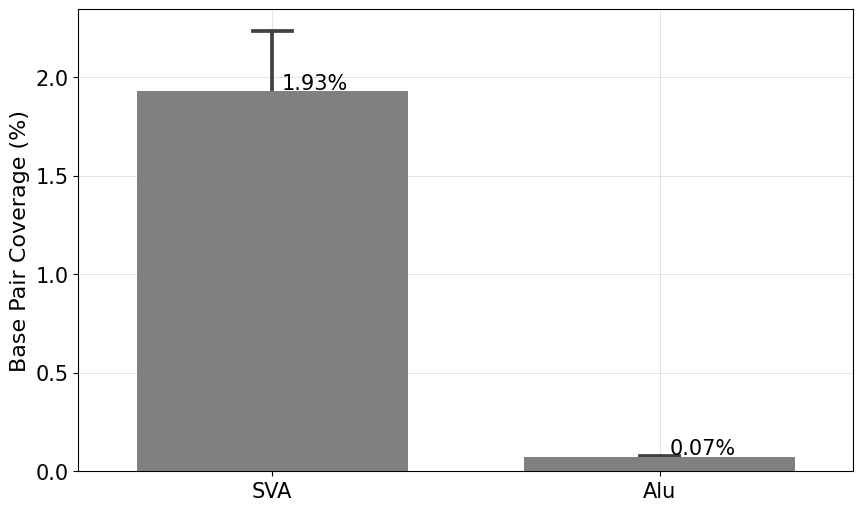

In [249]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

sns.barplot(data=repeat_elements, 
            y="coverage", 
            x="element", 
            ax=ax, 
            color="gray",
            width=0.7,
            errorbar=("ci", 99),
            capsize=.1, 
            order=["SVA", "Alu"],
            zorder=3)

for cat, patch in zip(["SVA", "Alu"], ax.patches):
    print(cat, repeat_elements_avg.loc[cat]["coverage"])
    ax.annotate(f'{repeat_elements_avg.loc[cat]["coverage"]:.2f}%', 
                xy=(patch.get_x() + patch.get_width()/2 + 0.025, patch.get_height() + 0.0125), 
                fontsize=15)
    
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_xlabel("")
ax.xaxis.label.set_size(16)
ax.set_ylabel("Base Pair Coverage (%)")
ax.yaxis.label.set_size(16)
ax.tick_params(axis="both", labelsize=13)
ax.tick_params(axis="both", labelsize=15)
fig.savefig(f"{target}/SVA_Alu_hdna_avg_coverage.png", bbox_inches='tight')

In [362]:
sva_coverage_with_hdna_g4 = pd.read_table(
                                sva_df_bed.coverage(hdna_with_g4).fn,
                                header=None,
                                names=["seqID", 
                                       "start", 
                                       "end", 
                                       "totalHits", 
                                       "overlappingBp", 
                                       "compartmentLength", 
                                       "coverage"]
)
sva_coverage_with_hdna_g4["coverage"] = 1e2 * sva_coverage_with_hdna_g4["coverage"]

sva_coverage_with_hdna_no_g4 = pd.read_table(
                                sva_df_bed.coverage(hdna_without_g4).fn,
                                header=None,
                                names=["seqID", "start", "end", "totalHits", "overlappingBp", "compartmentLength", "coverage"]
)
sva_coverage_with_hdna_no_g4["coverage"] = 1e2 * sva_coverage_with_hdna_no_g4["coverage"]

sva_coverage_all = pd.concat([
    sva_coverage_with_hdna_g4.assign(method="with_g4"),
    sva_coverage_with_hdna_no_g4.assign(method="without_g4")
])

sva_coverage = sva_coverage_with_hdna_g4.merge(
                                            sva_coverage_with_hdna_no_g4,
                                            on=["seqID", "start", "end"],
                                            how="outer",
                                            suffixes=("_with_g4", "_no_g4")
                                           )
sva_coverage["overlappingBp"] = sva_coverage["overlappingBp_with_g4"] + sva_coverage["overlappingBp_no_g4"]
sva_coverage["coverage"] = sva_coverage["overlappingBp"].div(sva_coverage["compartmentLength_with_g4"])
sva_coverage["totalHits"] = sva_coverage["totalHits_with_g4"] + sva_coverage["totalHits_no_g4"]

sva_coverage = sva_coverage.merge(
                                  sva_coverage_with_hdna,
                                  on=["seqID", "start", "end"],
                                  how="outer",
                                  suffixes=("", "_overall")
                            )
sva_coverage.head()

,seqID,start,end,totalHits_with_g4,overlappingBp_with_g4,compartmentLength_with_g4,coverage_with_g4,totalHits_no_g4,overlappingBp_no_g4,compartmentLength_no_g4,coverage_no_g4,overlappingBp,coverage,totalHits,totalHits_overall,overlappingBp_overall,compartmentLength,coverage_overall,has_HDNA
0,chr1,157687,157800,0,0,113,0.0,0,0,113,0.0,0,0.0,0,0,0,113,0.0,0
1,chr1,164502,164615,0,0,113,0.0,0,0,113,0.0,0,0.0,0,0,0,113,0.0,0
2,chr1,266063,266144,0,0,81,0.0,0,0,81,0.0,0,0.0,0,0,0,81,0.0,0
3,chr1,816150,816180,0,0,30,0.0,0,0,30,0.0,0,0.0,0,0,0,30,0.0,0
4,chr1,816489,816645,0,0,156,0.0,0,0,156,0.0,0,0.0,0,0,0,156,0.0,0


In [375]:
sva_df_bed.count()

6609

In [376]:
sva_coverage_with_hdna_g4 = pd.read_table(
                                sva_df_bed.coverage(hdna_unmerged_bed).fn,
                                header=None,
                                names=["seqID", 
                                       "start", 
                                       "end", 
                                       "totalHits", 
                                       "overlappingBp", 
                                       "compartmentLength", 
                                       "coverage"]
)
sva_coverage.query("totalHits > 0").shape

(1496, 21)

In [373]:
sva_coverage.query("totalHits > 0").shape

(1496, 21)

In [363]:
alu_coverage_with_hdna_g4 = pd.read_table(
                                alu_df_bed.coverage(hdna_with_g4).fn,
                                header=None,
                                names=["seqID", "start", "end", "totalHits", "overlappingBp", "compartmentLength", "coverage"]
)
alu_coverage_with_hdna_g4["coverage"] = 1e2 * alu_coverage_with_hdna_g4["coverage"]

alu_coverage_with_hdna_no_g4 = pd.read_table(
                                alu_df_bed.coverage(hdna_without_g4).fn,
                                header=None,
                                names=["seqID", "start", "end", "totalHits", "overlappingBp", "compartmentLength", "coverage"]
)
alu_coverage_with_hdna_no_g4["coverage"] = 1e2 * alu_coverage_with_hdna_no_g4["coverage"]

alu_coverage_all = pd.concat([
    alu_coverage_with_hdna_g4.assign(method="with_g4"),
    alu_coverage_with_hdna_no_g4.assign(method="without_g4")
    ])

alu_coverage = alu_coverage_with_hdna_g4.merge(
                                            alu_coverage_with_hdna_no_g4,
                                            on=["seqID", "start", "end"],
                                            how="outer",
                                            suffixes=("_with_g4", "_no_g4")
                                           )
alu_coverage["overlappingBp"] = alu_coverage["overlappingBp_with_g4"] + alu_coverage["overlappingBp_no_g4"]
alu_coverage["coverage"] = alu_coverage["overlappingBp"].div(alu_coverage["compartmentLength_with_g4"])
alu_coverage["totalHits"] = alu_coverage["totalHits_with_g4"] + alu_coverage["totalHits_no_g4"]

alu_coverage = alu_coverage.merge(
                                  alu_coverage_with_hdna,
                                  on=["seqID", "start", "end"],
                                  how="outer",
                                  suffixes=("", "_overall")
                            )

alu_coverage.head()

,seqID,start,end,totalHits_with_g4,overlappingBp_with_g4,compartmentLength_with_g4,coverage_with_g4,totalHits_no_g4,overlappingBp_no_g4,compartmentLength_no_g4,coverage_no_g4,overlappingBp,coverage,totalHits,totalHits_overall,overlappingBp_overall,compartmentLength,coverage_overall,has_HDNA
0,chr1,12273,12571,0,0,298,0.0,0,0,298,0.0,0,0.0,0,0,0,298,0.0,0
1,chr1,15892,16178,0,0,286,0.0,0,0,286,0.0,0,0.0,0,0,0,286,0.0,0
2,chr1,17013,17316,0,0,303,0.0,0,0,303,0.0,0,0.0,0,0,0,303,0.0,0
3,chr1,17320,17633,0,0,313,0.0,0,0,313,0.0,0,0.0,0,0,0,313,0.0,0
4,chr1,18381,18503,0,0,122,0.0,0,0,122,0.0,0,0.0,0,0,0,122,0.0,0


#### Total SVA Elements that contain at least 1 H-DNA

In [364]:
alu_coverage.loc[:, "has_at_least_1HDNA"] = (alu_coverage["totalHits"] > 0).astype(int)
sva_coverage.loc[:, "has_at_least_1HDNA"] = (sva_coverage["totalHits"] > 0).astype(int)

alu_coverage.loc[:, "has_at_least_1HDNA_without_g4"] = (alu_coverage["totalHits_no_g4"] > 0).astype(int)
sva_coverage.loc[:, "has_at_least_1HDNA_without_g4"] = (sva_coverage["totalHits_no_g4"] > 0).astype(int)

In [365]:
alu_coverage.has_at_least_1HDNA.value_counts()

has_at_least_1HDNA
0    1134638
1      12221
Name: count, dtype: int64

In [366]:
sva_coverage.shape

(6609, 21)

In [367]:
sva_coverage.has_at_least_1HDNA.value_counts()

has_at_least_1HDNA
0    5113
1    1496
Name: count, dtype: int64

In [368]:
sva_coverage.has_at_least_1HDNA.value_counts(normalize=True)

has_at_least_1HDNA
0    0.773642
1    0.226358
Name: proportion, dtype: float64

In [389]:
sva_coverage.query("totalHits > 0").totalHits_with_g4.sum()

2734

In [390]:
sva_coverage.query("totalHits > 0 & totalHits_with_g4 == 0").totalHits_no_g4.shape

(146,)

In [391]:
alu_coverage.query("totalHits > 0 & totalHits_with_g4 == 0").totalHits_no_g4.shape

(11765,)

In [261]:
sva_coverage['totalHits_with_g4'].sum()

2726

In [273]:
sva_coverage_with_hdna.totalHits.sum()

3053

In [274]:
sva_coverage.has_at_least_1HDNA.value_counts(normalize=True)

has_at_least_1HDNA
0    0.773642
1    0.226358
Name: proportion, dtype: float64

In [275]:
alu_coverage.has_at_least_1HDNA_without_g4.value_counts(normalize=True)

has_at_least_1HDNA_without_g4
0    0.989594
1    0.010406
Name: proportion, dtype: float64

In [276]:
sva_coverage.has_at_least_1HDNA_without_g4.value_counts(normalize=True)

has_at_least_1HDNA_without_g4
0    0.941897
1    0.058103
Name: proportion, dtype: float64

#### Validation of base pairs

In [277]:
sva_coverage["validated_bp"] = (sva_coverage["overlappingBp"] == sva_coverage["overlappingBp_overall"]).astype(int)
alu_coverage["validated_bp"] = (alu_coverage["totalHits"] == alu_coverage["totalHits_overall"]).astype(int)

In [278]:
sva_coverage.validated_bp.sum(), alu_coverage.validated_bp.sum()

(6402, 1146278)

In [392]:
alu_coverage[["coverage_overall", "coverage_with_g4", "coverage_no_g4"]].mean()

coverage_overall    0.073078
coverage_with_g4    0.001907
coverage_no_g4      0.071171
dtype: float64

In [393]:
alu_coverage[["overlappingBp", "overlappingBp_with_g4", "overlappingBp_no_g4"]].median()

overlappingBp            0.0
overlappingBp_with_g4    0.0
overlappingBp_no_g4      0.0
dtype: float64

In [394]:
sva_coverage[["coverage_overall", "coverage_with_g4", "coverage_no_g4"]].mean()

coverage_overall    1.928095
coverage_with_g4    1.155640
coverage_no_g4      0.772455
dtype: float64

In [395]:
sva_coverage[["overlappingBp", "overlappingBp_with_g4", "overlappingBp_no_g4"]].median()

overlappingBp            0.0
overlappingBp_with_g4    0.0
overlappingBp_no_g4      0.0
dtype: float64

In [396]:
transposable_df = pd.concat([
                    alu_coverage_all.assign(element="Alu"),
                    sva_coverage_all.assign(element="SVA")
    ])
transposable_df["method"] = transposable_df["method"].replace("with_g4", "H-DNA with G4")\
                                                     .replace("without_g4", "H-DNA without G4")
transposable_df

,seqID,start,end,totalHits,overlappingBp,compartmentLength,coverage,method,element
0,chr1,12273,12571,0,0,298,0.0,H-DNA with G4,Alu
1,chr1,15892,16178,0,0,286,0.0,H-DNA with G4,Alu
2,chr1,17013,17316,0,0,303,0.0,H-DNA with G4,Alu
3,chr1,17320,17633,0,0,313,0.0,H-DNA with G4,Alu
4,chr1,18381,18503,0,0,122,0.0,H-DNA with G4,Alu
...,...,...,...,...,...,...,...,...,...
6604,chrY,62068595,62068647,0,0,52,0.0,H-DNA without G4,SVA
6605,chrY,62070341,62070387,0,0,46,0.0,H-DNA without G4,SVA
6606,chrY,62071643,62071712,0,0,69,0.0,H-DNA without G4,SVA
6607,chrY,62071867,62071918,0,0,51,0.0,H-DNA without G4,SVA


In [397]:
transposable_avg = transposable_df.groupby(["element", "method"])\
                                                            .agg(avg_cov=("coverage", "mean"), 
                                                                      std_cov=("coverage", "std"))

transposable_avg_index = transposable_avg.index
print(transposable_avg_index)
transposable_avg

MultiIndex([('Alu',    'H-DNA with G4'),
            ('Alu', 'H-DNA without G4'),
            ('SVA',    'H-DNA with G4'),
            ('SVA', 'H-DNA without G4')],
           names=['element', 'method'])


avg_cov   std_cov
element method                              
Alu     H-DNA with G4     0.001907  0.239121
        H-DNA without G4  0.071171  1.292620
SVA     H-DNA with G4     1.155640  7.148188
        H-DNA without G4  0.772455  6.652408

In [398]:
transposable_avg.loc['SVA', 'H-DNA with G4']['avg_cov']

1.1556399697382358

In [399]:
sva_coverage_with_hdna.coverage.mean(), alu_coverage_with_hdna.coverage.mean()

(1.9280945074897868, 0.07307790612446693)

In [400]:
sva_coverage

,seqID,start,end,totalHits_with_g4,overlappingBp_with_g4,compartmentLength_with_g4,coverage_with_g4,totalHits_no_g4,overlappingBp_no_g4,compartmentLength_no_g4,...,overlappingBp,coverage,totalHits,totalHits_overall,overlappingBp_overall,compartmentLength,coverage_overall,has_HDNA,has_at_least_1HDNA,has_at_least_1HDNA_without_g4
0,chr1,157687,157800,0,0,113,0.0,0,0,113,...,0,0.0,0,0,0,113,0.0,0,0,0
1,chr1,164502,164615,0,0,113,0.0,0,0,113,...,0,0.0,0,0,0,113,0.0,0,0,0
2,chr1,266063,266144,0,0,81,0.0,0,0,81,...,0,0.0,0,0,0,81,0.0,0,0,0
3,chr1,816150,816180,0,0,30,0.0,0,0,30,...,0,0.0,0,0,0,30,0.0,0,0,0
4,chr1,816489,816645,0,0,156,0.0,0,0,156,...,0,0.0,0,0,0,156,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6604,chrY,62068595,62068647,0,0,52,0.0,0,0,52,...,0,0.0,0,0,0,52,0.0,0,0,0
6605,chrY,62070341,62070387,0,0,46,0.0,0,0,46,...,0,0.0,0,0,0,46,0.0,0,0,0
6606,chrY,62071643,62071712,0,0,69,0.0,0,0,69,...,0,0.0,0,0,0,69,0.0,0,0,0
6607,chrY,62071867,62071918,0,0,51,0.0,0,0,51,...,0,0.0,0,0,0,51,0.0,0,0,0


In [404]:
sva_coverage.query("coverage_overall == 100.0").shape

(28, 21)

In [405]:
alu_coverage.query("coverage_overall == 100.0").shape

(96, 21)

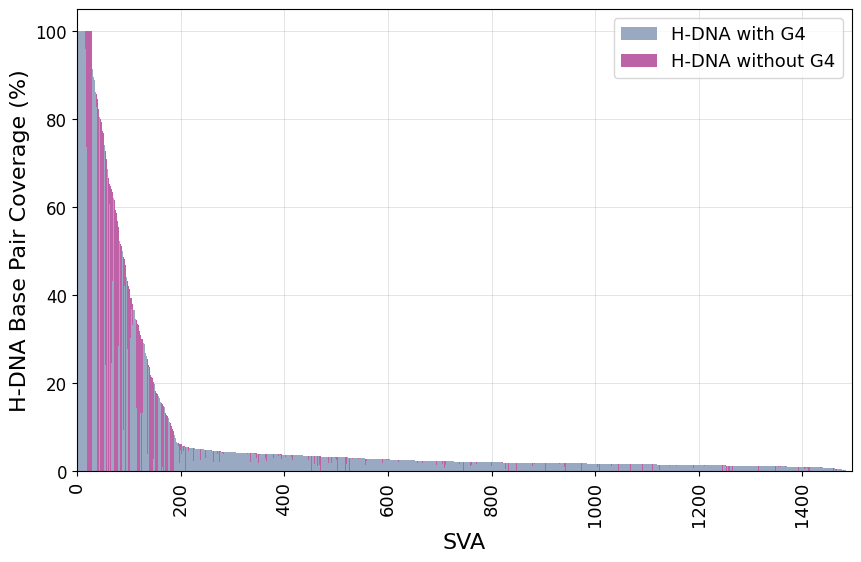

In [411]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

coverage_sva_sorted = sva_coverage.query("coverage_overall > 0")\
                    .sort_values(by=["coverage_overall", "coverage_with_g4"], 
                                 ascending=False)

coverage_sva_sorted = coverage_sva_sorted.reset_index()[["coverage_with_g4", 
                                   "coverage_no_g4"]]\
                .rename(columns={"coverage_with_g4": "H-DNA with G4",
                                 "coverage_no_g4": "H-DNA without G4"
                                })
coverage_sva_sorted.plot(kind="bar", 
                      stacked=True,
                      ax=ax,
                     color={"H-DNA with G4": "#99a9c2", 
                            "H-DNA without G4": "#bd62a6"},
                      width=1.0)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_xticks(range(0, len(coverage_sva_sorted.index), 200))
ax.set_axisbelow(True)
ax.set_ylabel("H-DNA Base Pair Coverage (%)")
ax.set_xlabel("SVA")
ax.legend(loc=0, prop={"size": 13})
ax.yaxis.label.set_size(16)
ax.xaxis.label.set_size(16)
ax.tick_params(axis="both", labelsize=12, zorder=0)
ax.tick_params(axis="x", labelsize=13, zorder=0)

# ax.set_title("SVA with at least 5% H-DNA Coverage")

target = Path("figures_hdna_rtr/")
fig.savefig(f"{target}/SVA_hdna_g4_top_coverage.png", bbox_inches='tight')

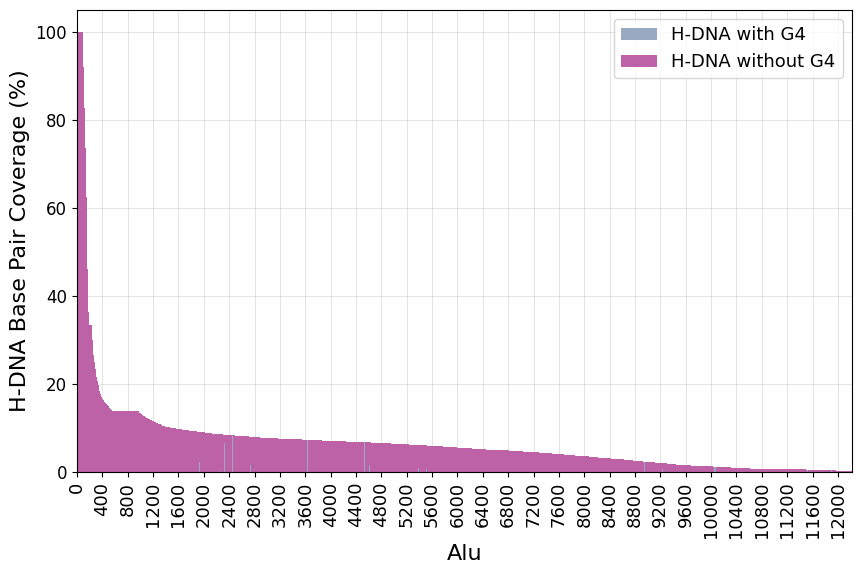

In [412]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

coverage_alu_sorted = alu_coverage.query("coverage_overall > 0")\
                    .sort_values(by=["coverage_overall", "coverage_with_g4"], 
                                 ascending=False)

coverage_alu_sorted = coverage_alu_sorted.reset_index()[["coverage_with_g4", 
                                   "coverage_no_g4"]]\
                .rename(columns={"coverage_with_g4": "H-DNA with G4",
                                 "coverage_no_g4": "H-DNA without G4"
                                })
coverage_alu_sorted.plot(kind="bar", 
                      stacked=True,
                      ax=ax,
                     color={"H-DNA with G4": "#99a9c2", 
                            "H-DNA without G4": "#bd62a6"},
                      width=1.0)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
# ax.set_xticks([])
ax.set_xticks(range(0, len(coverage_alu_sorted.index), 400))
ax.set_axisbelow(True)
ax.set_ylabel("H-DNA Base Pair Coverage (%)")
ax.set_xlabel("Alu")
ax.legend(loc=0, prop={"size": 13})
ax.yaxis.label.set_size(16)
ax.xaxis.label.set_size(16)
ax.tick_params(axis="both", labelsize=12, zorder=0)
ax.tick_params(axis="x", labelsize=13, zorder=0)
fig.savefig(f"{target}/Alu_hdna_g4_top_coverage.png", bbox_inches='tight')

['SVA', 'H-DNA with G4'] 1.1556399697382358
['Alu', 'H-DNA with G4'] 0.0019065973149271183
['SVA', 'H-DNA without G4'] 0.7724545422908156
['Alu', 'H-DNA without G4'] 0.07117130876594246


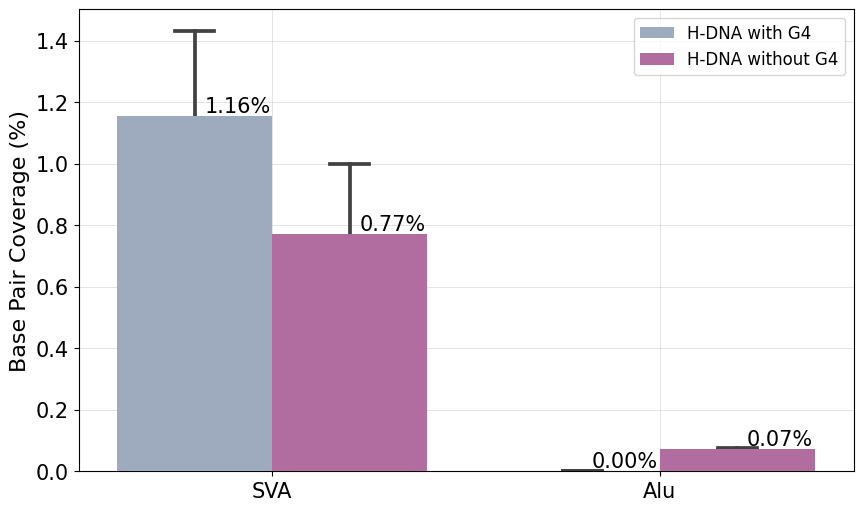

In [408]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

sns.barplot(data=transposable_df, 
            y="coverage", 
            x="element", 
            hue="method", 
            ax=ax, 
            palette={"H-DNA with G4": "#99a9c2", 
                     "H-DNA without G4": "#bd62a6"},
            capsize=.1, 
            errorbar=("ci", 99),
            order=["SVA", "Alu"],
            hue_order=["H-DNA with G4", "H-DNA without G4"],
            zorder=3)

for cat, patch in zip([["SVA", "H-DNA with G4"], 
                       ["Alu", "H-DNA with G4"],
                       ["SVA", "H-DNA without G4"],
                       ["Alu", "H-DNA without G4"]],
                      ax.patches):
    print(cat, transposable_avg.loc[cat[0], cat[1]]["avg_cov"])
    ax.annotate(f'{transposable_avg.loc[cat[0], cat[1]]["avg_cov"]:.2f}%', 
                xy=(patch.get_x() + patch.get_width()/2 + 0.025, patch.get_height() + 0.0125), 
                fontsize=15)
    
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_xlabel("")
ax.xaxis.label.set_size(16)
ax.set_ylabel("Base Pair Coverage (%)")
ax.yaxis.label.set_size(16)
ax.tick_params(axis="both", labelsize=13)
ax.tick_params(axis="both", labelsize=15)
ax.legend(loc=0, prop={"size": 12})
fig.savefig(f"{target}/SVA_Alu_hdna_g4_breakdown_avg_coverage.png", bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

sns.stripplot(data=transposable_df, 
            y="coverage", 
            x="element", 
            hue="method", 
            alpha=0.4,
            ax=ax, 
            palette={"H-DNA with G4": "#99a9c2", "H-DNA without G4": "#bd62a6"},
            order=["SVA", "Alu"],
            hue_order=["H-DNA with G4", "H-DNA without G4"],
            zorder=3)
    
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_xlabel("Transposable Element")
ax.xaxis.label.set_size(16)
ax.set_ylabel("Base Pair Coverage (%)")
ax.yaxis.label.set_size(16)
ax.tick_params(axis="both", labelsize=13)
ax.legend(loc=0, prop={"size": 12})

In [233]:
hdna_without_g4 = pd.read_table(
                        BedTool.from_dataframe(df_hdna)\
                                    .sort()\
                                    .subtract(g4_bed).fn,
                        header=None,
                        names=df_hdna.columns.tolist() # + ["chrom", "g4_start", "g4_end", "overlap"]
)
hdna_without_g4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,chr1,50088,50102,ggaaggaagga,gcaagga,ggaaggaaggagcaaggaaggaaggaagg,11,7,29,5,6,0,0,5A/0C/6G/0T,0.448276,0.034483,0.965517
1,chr1,50095,50102,aaggaaggaag,.,aaggaaggaaggaaggaaggaa,11,0,22,6,5,0,0,6A/0C/5G/0T,0.545455,0.000000,1.000000
2,chr1,50097,50102,ggaaggaagga,.,ggaaggaaggaaggaaggaagg,11,0,22,5,6,0,0,5A/0C/6G/0T,0.454545,0.000000,1.000000
3,chr1,73360,73386,gaaagaaaga,agagag,gaaagaaagaagagagagaaagaaag,10,6,26,7,3,0,0,7A/0C/3G/0T,0.653846,0.000000,1.000000
4,chr1,73390,73429,agaaagaaaaagaaagaaa,g,agaaagaaaaagaaagaaagaaagaaagaaaaagaaaga,19,1,39,15,4,0,0,15A/0C/4G/0T,0.769231,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194777,chrY,62192836,62192863,tctctctctctct,c,tctctctctctctctctctctctctct,13,1,27,0,0,6,7,0A/6C/0G/7T,0.518519,1.000000,0.000000
194778,chrY,62192837,62192864,ctctctctctctc,t,ctctctctctctctctctctctctctc,13,1,27,0,0,7,6,0A/7C/0G/6T,0.481481,1.000000,0.000000
194779,chrY,62247108,62247130,aaagaaggaag,.,aaagaaggaaggaaggaagaaa,11,0,22,7,4,0,0,7A/0C/4G/0T,0.636364,0.000000,1.000000
194780,chrY,62255805,62255833,aggaggaggaggag,.,aggaggaggaggaggaggaggaggagga,14,0,28,5,9,0,0,5A/0C/9G/0T,0.357143,0.000000,1.000000


In [222]:
df_hdna.head()

,seqID,start,end,sequenceOfArm,sequenceOfSpacer,sequence,armLength,spacerLength,sequenceLength,arm_a,arm_g,arm_c,arm_t,composition,at,ct,ag
11,chr1,50042,50071,ggagggaggga,ggcagaa,ggagggagggaggcagaaagggagggagg,11,7,29,3,8,0,0,3A/0C/8G/0T,0.310345,0.034483,0.965517
12,chr1,50059,50086,aagggaggga,ggcagaa,aagggagggaggcagaaagggagggaa,10,7,27,4,6,0,0,4A/0C/6G/0T,0.407407,0.037037,0.962963
13,chr1,50082,50111,ggaaggaagga,gcaagga,ggaaggaaggagcaaggaaggaaggaagg,11,7,29,5,6,0,0,5A/0C/6G/0T,0.448276,0.034483,0.965517
14,chr1,50095,50117,aaggaaggaag,.,aaggaaggaaggaaggaaggaa,11,0,22,6,5,0,0,6A/0C/5G/0T,0.545455,0.000000,1.000000
15,chr1,50097,50119,ggaaggaagga,.,ggaaggaaggaaggaaggaagg,11,0,22,5,6,0,0,5A/0C/6G/0T,0.454545,0.000000,1.000000


In [122]:
alu_hdna_intersect = pd.read_table(
            alu_df_bed.coverage(hdna_bed).fn,
            header=None,
            names=["seqID", "start", "end", "totalHits", "overlappingBp", "compartmentLength", "overlap"]
)

alu_g4_intersect = pd.read_table(
            alu_df_bed.coverage(g4_bed).fn,
            header=None,
            names=["seqID", "start", "end", "totalHits", "overlappingBp", "compartmentLength", "overlap"]
)

sva_hdna_intersect = pd.read_table(
            sva_df_bed.coverage(hdna_bed).fn,
            header=None,
            names=["seqID", "start", "end", "totalHits", "overlappingBp", "compartmentLength", "overlap"]
)

sva_g4_intersect = pd.read_table(
            sva_df_bed.coverage(g4_bed).fn,
            header=None,
            names=["seqID", "start", "end", "totalHits", "overlappingBp", "compartmentLength", "overlap"]
)

In [123]:
alu_hdna_intersect.loc[:, "hdna_overlaps_with_alu"] = (alu_hdna_intersect['totalHits']>0).astype(int)
alu_g4_intersect.loc[:, "hdna_overlaps_with_alu"] = (alu_g4_intersect['totalHits']>0).astype(int)
sva_hdna_intersect.loc[:, "hdna_overlaps_with_alu"] = (sva_hdna_intersect['totalHits']>0).astype(int)
sva_g4_intersect.loc[:, "hdna_overlaps_with_alu"] = (sva_g4_intersect['totalHits']>0).astype(int)

In [124]:
alu_hdna_intersect['totalHits'].sum()

15785

In [106]:
alu_hdna_intersect.hdna_overlaps_with_alu.value_counts(normalize=True)

hdna_overlaps_with_alu
0    0.98911
1    0.01089
Name: proportion, dtype: float64

In [107]:
alu_g4_intersect.hdna_overlaps_with_alu.value_counts(normalize=True)

hdna_overlaps_with_alu
0    0.963715
1    0.036285
Name: proportion, dtype: float64

In [108]:
sva_hdna_intersect.hdna_overlaps_with_alu.value_counts(normalize=True)

hdna_overlaps_with_alu
0    0.753972
1    0.246028
Name: proportion, dtype: float64

In [109]:
sva_g4_intersect.hdna_overlaps_with_alu.value_counts(normalize=True) * 1e2

hdna_overlaps_with_alu
0    55.348767
1    44.651233
Name: proportion, dtype: float64

In [116]:
joint.fn

'/storage/home/nmc6088/scratch/pybedtools.sox2lcjb.tmp'

In [117]:
!wc -l /storage/home/nmc6088/scratch/pybedtools.sox2lcjb.tmp

121734 /storage/home/nmc6088/scratch/pybedtools.sox2lcjb.tmp


In [110]:
joint = hdna_bed.intersect(g4_bed)

alu_hdna_intersect = pd.read_table(
            alu_df_bed.coverage(joint).fn,
            header=None,
            names=["seqID", "start", "end", "totalHits", "overlappingBp", "compartmentLength", "overlap"]
)

sva_hdna_intersect = pd.read_table(
            sva_df_bed.coverage(joint).fn,
            header=None,
            names=["seqID", "start", "end", "totalHits", "overlappingBp", "compartmentLength", "overlap"]
)

In [111]:
alu_hdna_intersect.loc[:, "hdna_overlaps_with_alu"] = (alu_hdna_intersect['totalHits']>0).astype(int)
sva_hdna_intersect.loc[:, "hdna_overlaps_with_alu"] = (sva_hdna_intersect['totalHits']>0).astype(int)

In [112]:
alu_hdna_intersect.hdna_overlaps_with_alu.value_counts(normalize=True) * 1e2

hdna_overlaps_with_alu
0    99.959367
1     0.040633
Name: proportion, dtype: float64

In [114]:
sva_hdna_intersect.hdna_overlaps_with_alu.value_counts()

hdna_overlaps_with_alu
0    5127
1    1482
Name: count, dtype: int64

In [119]:
alu_hdna_intersect['totalHits'].sum()

587

In [120]:
alu_hdna_intersect.hdna_overlaps_with_alu.value_counts(normalize=True) * 1e2

hdna_overlaps_with_alu
0    99.959367
1     0.040633
Name: proportion, dtype: float64

In [118]:
sva_hdna_intersect['totalHits'].sum()

7697

In [115]:
sva_hdna_intersect.hdna_overlaps_with_alu.value_counts().sum()

6609

In [113]:
sva_hdna_intersect.hdna_overlaps_with_alu.value_counts(normalize=True) * 1e2

hdna_overlaps_with_alu
0    77.576033
1    22.423967
Name: proportion, dtype: float64

# Longest Mirror Repeats Gene Families

In [125]:
!wget https://s3-us-west-2.amazonaws.com/human-pangenomics/T2T/CHM13/assemblies/annotation/chm13v2.0_RefSeq_Liftoff_v5.2.gff3.gz

--2024-10-05 23:31:19--  https://s3-us-west-2.amazonaws.com/human-pangenomics/T2T/CHM13/assemblies/annotation/chm13v2.0_RefSeq_Liftoff_v5.2.gff3.gz
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.92.149.232, 52.92.210.216, 52.92.230.232, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.92.149.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56368414 (54M) [binary/octet-stream]
Saving to: ‘chm13v2.0_RefSeq_Liftoff_v5.2.gff3.gz’

chm13v2.0_RefSeq_Li 100%[===================>]  53.76M  8.47MB/s    in 15s     

2024-10-05 23:31:35 (3.53 MB/s) - ‘chm13v2.0_RefSeq_Liftoff_v5.2.gff3.gz’ saved [56368414/56368414]



In [114]:
GFF_PATH = Path("/storage/group/izg5139/default/nicole/datasets/GCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz")
sequence_report = pd.read_table("/storage/group/izg5139/default/nicole/datasets/sequence_report.tsv")
CHROMOSOME_MAPPING = sequence_report[["Chromosome name", "RefSeq seq accession"]].set_index("RefSeq seq accession")
CHROMOSOME_MAPPING["Chromosome name"] = CHROMOSOME_MAPPING["Chromosome name"].apply(lambda chr: f"chr{chr}")
CHROMOSOME_MAPPING = CHROMOSOME_MAPPING["Chromosome name"].to_dict()
CHROMOSOME_MAPPING

{'NC_060925.1': 'chr1',
 'NC_060926.1': 'chr2',
 'NC_060927.1': 'chr3',
 'NC_060928.1': 'chr4',
 'NC_060929.1': 'chr5',
 'NC_060930.1': 'chr6',
 'NC_060931.1': 'chr7',
 'NC_060932.1': 'chr8',
 'NC_060933.1': 'chr9',
 'NC_060934.1': 'chr10',
 'NC_060935.1': 'chr11',
 'NC_060936.1': 'chr12',
 'NC_060937.1': 'chr13',
 'NC_060938.1': 'chr14',
 'NC_060939.1': 'chr15',
 'NC_060940.1': 'chr16',
 'NC_060941.1': 'chr17',
 'NC_060942.1': 'chr18',
 'NC_060943.1': 'chr19',
 'NC_060944.1': 'chr20',
 'NC_060945.1': 'chr21',
 'NC_060946.1': 'chr22',
 'NC_060947.1': 'chrX',
 'NC_060948.1': 'chrY'}

In [115]:
genes_df = pd.read_table(GFF_PATH, 
                         usecols=[0, 2, 3, 4, 6, 8], 
                         header=None, 
                         comment="#",
                         names=["seqID", "compartment", "start", "end", "strand", "attributes"]
                        )
genes_df = genes_df[genes_df['compartment'].str.contains('gene')].reset_index(drop=True)
genes_df["seqID"] = genes_df["seqID"].map(CHROMOSOME_MAPPING)
genes_df["start"] = genes_df["start"] - 1

def parse_attributes(metadata):
    attributes = {}
    for attr in metadata.split(";"):
        name, value = attr.split("=")
        attributes.update({name: value})
    return attributes

def parse_biotype(metadata):
    attributes = parse_attributes(metadata)
    return attributes.get("gene_biotype", 
                          attributes.get("biotype")
                         )

def parse_gene_id(metadata):
    attributes = parse_attributes(metadata)
    return attributes.get("ID").split("-")[1]

genes_df.loc[:, "biotype"] = genes_df["attributes"].apply(parse_biotype)
genes_df.loc[:, "gene_id"] = genes_df["attributes"].apply(parse_gene_id)
genes_df.drop(columns=["attributes", "compartment"], inplace=True)
genes_df_bed = BedTool.from_dataframe(genes_df).sort()
genes_df.head()

,seqID,start,end,strand,biotype,gene_id
0,chr1,7505,138480,-,lncRNA,LOC127239154
1,chr1,20891,23710,-,lncRNA,LOC124905685
2,chr1,52978,54612,-,lncRNA,LOC101928626
3,chr1,111939,112877,-,protein_coding,OR4F16
4,chr1,144133,146717,-,pseudogene,SEPTIN14P14


#### Most Enriched Genes in H-DNA

In [116]:
hdna_bed = BedTool.from_dataframe(df_hdna).sort()# .merge()
print(hdna_bed.count())
gene_coverage = pd.read_table(
                        genes_df_bed.coverage(hdna_bed).fn,
                        header=None,
                        names=genes_df.columns.tolist() + ["totalHits", "overlappingBp", "compartmentLength", "coverage"]
                    )\
                .sort_values(by=["coverage"], ascending=False).reset_index(drop=True)
gene_coverage

235970


,seqID,start,end,strand,biotype,gene_id,totalHits,overlappingBp,compartmentLength,coverage
0,chr11,2221786,2221862,-,miRNA,MIR483,1,25,76,0.328947
1,chr20,64903341,64907432,+,lncRNA,HAR1A,71,973,4091,0.237839
2,chr12,122691312,122691405,-,miRNA,MIR9902,1,19,93,0.204301
3,chr12,122704714,122704807,-,miRNA,MIR9902,1,19,93,0.204301
4,chr5,152387732,152389913,+,pseudogene,GLULP1,15,430,2181,0.197157
...,...,...,...,...,...,...,...,...,...,...
59250,chr17,18218233,18261800,-,protein_coding,TOP3A,0,0,43567,0.000000
59251,chr17,18258686,18259498,+,pseudogene,RPL7AP65,0,0,812,0.000000
59252,chr17,18259949,18260336,+,pseudogene,RPL21P121,0,0,387,0.000000
59253,chr17,18262098,18274862,+,protein_coding,SMCR8,0,0,12764,0.000000


In [117]:
gene_coverage.head(30)

,seqID,start,end,strand,biotype,gene_id,totalHits,overlappingBp,compartmentLength,coverage
0,chr11,2221786,2221862,-,miRNA,MIR483,1,25,76,0.328947
1,chr20,64903341,64907432,+,lncRNA,HAR1A,71,973,4091,0.237839
2,chr12,122691312,122691405,-,miRNA,MIR9902,1,19,93,0.204301
3,chr12,122704714,122704807,-,miRNA,MIR9902,1,19,93,0.204301
4,chr5,152387732,152389913,+,pseudogene,GLULP1,15,430,2181,0.197157
5,chr14,2099802,2102788,-,lncRNA,LOC124907383,24,530,2986,0.177495
6,chr21,5068258,5071152,-,lncRNA,LOC124908219,21,508,2894,0.175536
7,chr21,4757563,4760457,-,lncRNA,LOC124908213,21,508,2894,0.175536
8,chr21,4979488,4982382,-,lncRNA,LOC124908218,21,508,2894,0.175536
9,chr21,5423338,5426232,-,lncRNA,LOC124908229,21,508,2894,0.175536


## Longest H-DNA Sequences Gene Proximity

In [118]:
longest_hdna = df_hdna.query("armLength >= 37").sort_values(by=['armLength'], ascending=False).reset_index(drop=True)
longest_hdna.head()

,seqID,start,end,sequenceOfArm,sequenceOfSpacer,sequence,armLength,spacerLength,sequenceLength,arm_a,arm_g,arm_c,arm_t,composition,at,ct,ag
0,chr1,39532903,39533700,cctctcctctcctctcctctcctctcctctcctctcctctcctctc...,c,cctctcctctcctctcctctcctctcctctcctctcctctcctctc...,398,1,797,0,0,239,159,0A/239C/0G/159T,0.398996,1.0,0.0
1,chr1,39532901,39533697,ctcctctcctctcctctcctctcctctcctctcctctcctctcctc...,.,ctcctctcctctcctctcctctcctctcctctcctctcctctcctc...,398,0,796,0,0,239,159,0A/239C/0G/159T,0.399497,1.0,0.0
2,chr5,79664036,79664663,aagggaagggaagggaagggaagggaagggaagggaagggaaggga...,g,aagggaagggaagggaagggaagggaagggaagggaagggaaggga...,313,1,627,126,187,0,0,126A/0C/187G/0T,0.401914,0.0,1.0
3,chr5,79664034,79664660,ggaagggaagggaagggaagggaagggaagggaagggaagggaagg...,.,ggaagggaagggaagggaagggaagggaagggaagggaagggaagg...,313,0,626,125,188,0,0,125A/0C/188G/0T,0.399361,0.0,1.0
4,chr5,70560509,70560943,gaagggaagggaagggaagggaagggaagggaagggaagggaaggg...,.,gaagggaagggaagggaagggaagggaagggaagggaagggaaggg...,217,0,434,87,130,0,0,87A/0C/130G/0T,0.400922,0.0,1.0


In [123]:
df_hdna_bed = BedTool.from_dataframe(longest_hdna[["seqID", "start", "end", "armLength", "spacerLength", "sequence"]]).sort()
df_hdna_bed

<BedTool(/storage/home/nmc6088/scratch/pybedtools.pbug8zy9.tmp)>

In [128]:
gene_intersections_with_large_hdna = pd.read_table(
                                                    df_hdna_bed.intersect(genes_df_bed, wo=True).fn,
                                                    header=None,
                                                    names=["seqID", "start", "end", "armLength", "spacerLength", "sequence"] + [
                                                        "chromosome", 
                                                        "motif_start",
                                                        "motif_end", 
                                                        "strand",
                                                        "biotype",
                                                        "gene_id",
                                                        "overlap"]
                    ).sort_values(by=["armLength"], ascending=False).query("armLength >= 60")

gene_intersections_with_large_hdna["biotype"] = gene_intersections_with_large_hdna["biotype"].replace("protein_coding", "Protein Coding")\
                                        .replace("pseudogene", "Pseudogene")
gene_intersections_with_large_hdna[["seqID", "start", "end", "armLength", "gene_id", "biotype", "overlap"]].set_index("seqID").head(30)

,start,end,armLength,gene_id,biotype,overlap
seqID,,,,,,
chr1,39532901,39533697,398,NT5C1A,Protein Coding,796
chr1,39532903,39533700,398,NT5C1A,Protein Coding,797
chr18,666958,667375,208,LINC01925,lncRNA,417
chr18,666963,667376,206,LINC01925,lncRNA,413
chr20,52435793,52436194,200,RIPOR3,Protein Coding,401
chr18,49776752,49777085,166,LIPG,Protein Coding,333
chr18,64594572,64594903,165,LINC01924,lncRNA,331
chr18,64594576,64594904,164,LINC01924,lncRNA,328
chr1,216765929,216766253,162,GPATCH2,Protein Coding,324


In [129]:
ranked_genes = gene_intersections_with_large_hdna['gene_id']
ranked_genes = list(set(ranked_genes))
print(len(ranked_genes))
for gene in ranked_genes:
    print(gene)

99
SLIT3
TMEM132D
RPTOR
NT5C1A
LOC105369559
LOC105375970
LOC105377294
ABCC3
TBCD
PKHD1
LINC01925
OLFM1
DLG2
INSYN2B
IGK
LOC124904603
DOCK2
SDR16C5
PCDH15
GUSBP15
MAP3K15
WDR64
RPL29P21
LOC124902422
RANBP2
CLSTN2
LOC105371302
LINC02770
ZAN
MID2
SOX6
GSG1L
LOC124902789
LOC100128993
SLC2A5
GPATCH2
DNAH17
IPO11
LRBA
LINC01619
USH2A
CLUL1
KIRREL3
ARHGAP22
VPS8
ADAP1
SGIP1
CHST8
DISC1FP1
GRID2
SUGCT
P2RX5
GPR139
PIK3C2A
LOC105371952
LINC00664
ZNF324B
NGB
CENPM
OR6J1
MTERF3
LOC128966592
FRMPD4
LOC105370055
RGPD5
PID1
ALOXE3
ANXA8
PRIM2
CNR2
LOC124904664
SLC24A3
ADGRE2
MEGF10
THSD7B
LIPG
LOC105379623
FGF14
PKD1L3
COPE
CCDC38
LINC01322
MIR4432HG
LOC101928335
MROH1
LINC02346
LOC107984393
PJA2
APBA1
LOC105369890
TPD52L1
ZNF423
RIPOR3
COL26A1
TRERF1
LINC01924
RNASE10
NTM
HGSNAT


# Cis Regulatory Elements

In [152]:
!wget https://hgdownload.soe.ucsc.edu/gbdb/hg38/encode3/ccre/encodeCcreCombined.bb

--2024-11-01 00:40:19--  https://hgdownload.soe.ucsc.edu/gbdb/hg38/encode3/ccre/encodeCcreCombined.bb
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49809776 (48M)
Saving to: ‘encodeCcreCombined.bb’

encodeCcreCombined. 100%[===================>]  47.50M  22.0MB/s    in 2.2s    

2024-11-01 00:40:22 (22.0 MB/s) - ‘encodeCcreCombined.bb’ saved [49809776/49809776]



In [161]:
!wget http://hgdownload.soe.ucsc.edu/admin/exe/linux.x86_64/bigBedToBed
# !wget https://hgdownload.cse.ucsc.edu/admin/exe/linux.x86_64/liftOver
# !wget https://hgdownload.cse.ucsc.edu/goldenpath/hg38/liftOver/hg38ToHs1.over.chain.gz

--2024-11-01 00:46:10--  http://hgdownload.soe.ucsc.edu/admin/exe/linux.x86_64/bigBedToBed
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9490896 (9.1M)
Saving to: ‘bigBedToBed’

bigBedToBed         100%[===================>]   9.05M  10.2MB/s    in 0.9s    

2024-11-01 00:46:11 (10.2 MB/s) - ‘bigBedToBed’ saved [9490896/9490896]



In [162]:
!chmod +x bigBedToBed
!chmod +x liftOver

In [164]:
!./bigBedToBed encodeCcreCombined.bb encodeCcreCombined.bed

In [171]:
!awk -F '\t' '{ print $1 "\t" $2 "\t" $3 "\t" $10 }' encodeCcreCombined.bed > encodeCcreCombined.filtered.bed

In [172]:
!./liftOver encodeCcreCombined.filtered.bed hg38ToHs1.over.chain.gz encodeCcreCombined.hs1.bed encodeCcreCombined.unmapped.bed

Reading liftover chains
Mapping coordinates


In [180]:
encode = pd.read_table("encodeCcreCombined.hs1.bed", 
                       header=None, 
                       names=["seqID", "start", "end", "cis_element"])
encode["cis_element"] = encode["cis_element"].str.split(",")
encode = encode.explode("cis_element")
cis_elements = encode['cis_element'].unique()
print(cis_elements)
encode

['dELS' 'CTCF-bound' 'PLS' 'pELS' 'CTCF-only' 'DNase-H3K4me3']


,seqID,start,end,cis_element
0,chr20,81188,81394,dELS
0,chr20,81188,81394,CTCF-bound
1,chr1,205099,205449,PLS
1,chr1,205099,205449,CTCF-bound
2,chr1,205623,205892,PLS
...,...,...,...,...
924305,chrY,62093073,62093343,CTCF-bound
924306,chrY,62093580,62093782,CTCF-only
924306,chrY,62093580,62093782,CTCF-bound
924307,chrY,62103837,62104089,CTCF-only


In [193]:
GENOME_PATH = Path("/storage/group/izg5139/default/nicole//datasets/genome.txt")
human_chromosomes = pd.read_table(GENOME_PATH, 
                                  header=None, 
                                  names=["seqID", "size"])
human_chromosomes["start"] = 0
human_chromosomes = human_chromosomes.rename(columns={"size": "end"})
human_chromosomes.loc[:, "cis_element"] = "Genome-Wide"
human_chromosomes = human_chromosomes[["seqID", "start", "end", "cis_element"]]
human_chromosomes

,seqID,start,end,cis_element
0,chr1,0,248387328,Genome-Wide
1,chr2,0,242696752,Genome-Wide
2,chr3,0,201105948,Genome-Wide
3,chr4,0,193574945,Genome-Wide
4,chr5,0,182045439,Genome-Wide
5,chr6,0,172126628,Genome-Wide
6,chr7,0,160567428,Genome-Wide
7,chr8,0,146259331,Genome-Wide
8,chr9,0,150617247,Genome-Wide
9,chr10,0,134758134,Genome-Wide


In [201]:
encode_merged = []
for element in tqdm(cis_elements):
    temp = BedTool.from_dataframe(encode[encode["cis_element"] == element]).sort().merge()
    temp_df = pd.read_table(temp.fn, header=None, names=["seqID", "start", "end"])
    temp_df.loc[:, "cis_element"] = element
    encode_merged.append(temp_df)
encode_merged = pd.concat(encode_merged) #+ [human_chromosomes])
encode_merged

100%|██████████| 6/6 [00:07<00:00,  1.19s/it]


,seqID,start,end,cis_element
0,chr1,236642,236822,dELS
1,chr1,241019,241172,dELS
2,chr1,248900,249234,dELS
3,chr1,263330,263518,dELS
4,chr1,269616,269786,dELS
...,...,...,...,...
25385,chrY,21977791,21978133,DNase-H3K4me3
25386,chrY,21984499,21984844,DNase-H3K4me3
25387,chrY,22021660,22021979,DNase-H3K4me3
25388,chrY,22025277,22025623,DNase-H3K4me3


In [202]:
df_hdna_bed = BedTool.from_dataframe(df_hdna).sort().merge()
df_hdna_bed

<BedTool(/storage/home/nmc6088/scratch/pybedtools.vlgv3dpy.tmp)>

In [203]:
encode_merged_bed = BedTool.from_dataframe(encode_merged)
coverage_encode = pd.read_table(
                encode_merged_bed.coverage(df_hdna_bed).fn,
                header=None,
                names=["seqID", "start", "end", "cis_element", "totalHits", "overlappingBp", "compartmentLength", "coverage"]
)
coverage_encode["coverage"] = 1e2 * coverage_encode["coverage"]
coverage_encode

,seqID,start,end,cis_element,totalHits,overlappingBp,compartmentLength,coverage
0,chr1,236642,236822,dELS,0,0,180,0.0
1,chr1,241019,241172,dELS,0,0,153,0.0
2,chr1,248900,249234,dELS,0,0,334,0.0
3,chr1,263330,263518,dELS,0,0,188,0.0
4,chr1,269616,269786,dELS,0,0,170,0.0
...,...,...,...,...,...,...,...,...
1309258,chrY,21977791,21978133,DNase-H3K4me3,0,0,342,0.0
1309259,chrY,21984499,21984844,DNase-H3K4me3,0,0,345,0.0
1309260,chrY,22021660,22021979,DNase-H3K4me3,0,0,319,0.0
1309261,chrY,22025277,22025623,DNase-H3K4me3,0,0,346,0.0


In [187]:
coverage_encode_grouped = coverage_encode.groupby("cis_element", as_index=False)\
                            .agg({"overlappingBp": "sum", "compartmentLength": "sum"})\
                            .assign(density=lambda ds: 1e2 * ds['overlappingBp'].div(ds['compartmentLength']))
coverage_encode_grouped

,cis_element,overlappingBp,compartmentLength,density
0,CTCF-bound,105521,101950383,0.103502
1,CTCF-only,10488,14450829,0.072577
2,DNase-H3K4me3,8532,6784093,0.125765
3,PLS,19884,9944102,0.199958
4,dELS,205114,185504077,0.110571
5,pELS,40605,36567899,0.111040


In [204]:
coverage_encode_avg = coverage_encode.groupby("cis_element", as_index=False)\
                            .agg({"coverage": "mean"})\
                            .sort_values(by=["coverage"], ascending=False)
coverage_encode_avg

,cis_element,coverage
3,PLS,0.181208
4,dELS,0.105995
5,pELS,0.102732
0,CTCF-bound,0.094016
2,DNase-H3K4me3,0.092981
1,CTCF-only,0.066404


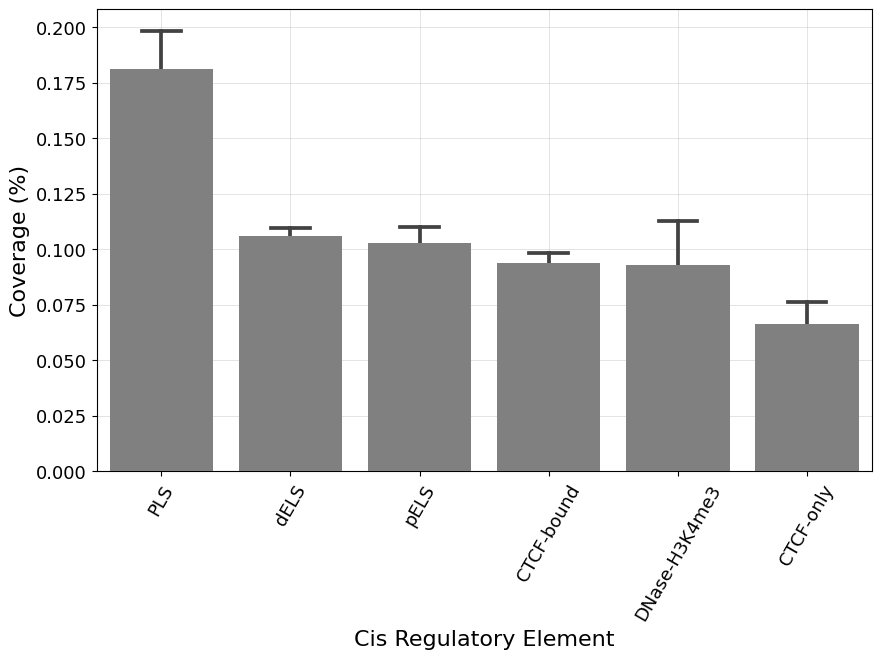

In [205]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.barplot(data=coverage_encode,
            x="cis_element",
            y="coverage",
            zorder=3,
            color="gray",
            order=coverage_encode_avg['cis_element'].tolist(),
            capsize=.3,
            ax=ax
           )
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_ylabel("Coverage (%)")
ax.xaxis.label.set_size(16)
ax.set_xlabel("Cis Regulatory Element")
ax.yaxis.label.set_size(16)
ax.tick_params(axis="both", labelsize=13)
ax.tick_params(axis="x", rotation=60)
hdna_rtr = Path("figures_hdna_rtr")
hdna_rtr.mkdir(exist_ok=True)
fig.savefig(f"{hdna_rtr}/cis_regulatory_hdna.png", 
            bbox_inches='tight')